# Rossmann Store Sales
### Data Cleansing & EDA

In [2]:
#library
import pandas as pd

In [3]:
#data
ss=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/sample_submission.csv")
store=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/store.csv")
test=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/test.csv")
train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")

/tmp/ipykernel_25849/2913490085.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")


In [4]:
ss

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [5]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
#nrows and ncols 
nrow1 = ss.shape[0]
print(nrow1)

ncol1 = ss.shape[1]
print(ncol1)

41088
2


In [9]:
nrow2 = store.shape[0]
print(nrow2)

ncol2 = store.shape[1]
print(ncol2)

1115
10


In [10]:
nrow3 = test.shape[0]
print(nrow3)

ncol3 = test.shape[1]
print(ncol3)

41088
8


In [11]:
nrow4 = train.shape[0]
print(nrow4)

ncol4 = train.shape[1]
print(ncol4)

1017209
9


In [12]:
#merge train with store 
data=pd.merge(train,store, on="Store", how="left")

In [13]:
nrow5 = data.shape[0]
print(nrow5)

ncol5= data.shape[1]
print(ncol5)

1017209
18


In [14]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
#data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [16]:
#change type of integers as factor
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Promo'] = data['Promo'].astype('category')
data['Open'] = data['Open'].astype('category')
data['SchoolHoliday'] = data['SchoolHoliday'].astype('category')
data['Promo2'] = data['Promo2'].astype('category')
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].astype('category')
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].astype('category')
data['Promo2SinceWeek'] = data['Promo2SinceWeek'].astype('category')
data['Promo2SinceYear'] = data['Promo2SinceYear'].astype('category')

In [17]:
#check for NA or NaN
na_columns=data.isna().any()
print(na_columns)


Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool


In [18]:
#I calculate sd in order to check for outliers and decide if i replace the missing values with mean or median
#pandas ignore Na and Nan

In [19]:
print(data.describe())

              Store         Sales     Customers  CompetitionDistance
count  1.017209e+06  1.017209e+06  1.017209e+06         1.014567e+06
mean   5.584297e+02  5.773819e+03  6.331459e+02         5.430086e+03
std    3.219087e+02  3.849926e+03  4.644117e+02         7.715324e+03
min    1.000000e+00  0.000000e+00  0.000000e+00         2.000000e+01
25%    2.800000e+02  3.727000e+03  4.050000e+02         7.100000e+02
50%    5.580000e+02  5.744000e+03  6.090000e+02         2.330000e+03
75%    8.380000e+02  7.856000e+03  8.370000e+02         6.890000e+03
max    1.115000e+03  4.155100e+04  7.388000e+03         7.586000e+04


In [20]:
#some variables have large sd so it is better to replace with median
#i replace NA in categorical variables with the most frequent value

In [21]:
median_value = data["CompetitionDistance"].median()
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(median_value)

In [22]:
m_freq = data["CompetitionOpenSinceMonth"].mode()[0]
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(m_freq)

In [23]:
m_freq = data["CompetitionOpenSinceYear"].mode()[0]
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(m_freq)

In [24]:
m_freq = data["Promo2SinceWeek"].mode()[0]
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(m_freq)

In [25]:
m_freq = data["Promo2SinceYear"].mode()[0]
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(m_freq)

In [26]:
most_frequent = data["PromoInterval"].mode()[0]
data["PromoInterval"] = data["PromoInterval"].fillna(most_frequent)

In [27]:
#There are open stores with no sales
median_sales = data[(data['Open'] == 1) & (data['Sales'] > 0)]['Sales'].median()
data.loc[(data['Open'] == 1) & (data['Sales'] == 0), 'Sales'] = median_sales

In [28]:
#There are open stores with no customers
median_cust = data[(data['Open'] == 1) & (data['Customers'] > 0)]['Customers'].median()
data.loc[(data['Open'] == 1) & (data['Customers'] == 0), 'Customers'] = median_cust

In [29]:
#check

In [30]:
na_columns_check1 = data.isna().any()
print(na_columns_check1)

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool


In [31]:
#check for wrong data
data[data["Sales"]<0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [32]:
data[data["Customers"]<0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [33]:
print(data["Open"].unique())


[1, 0]
Categories (2, int64): [0, 1]


In [34]:
data["StateHoliday"] =data["StateHoliday"].astype(str)
print(data["StateHoliday"].unique())


['0' 'a' 'b' 'c']


In [35]:
print(data["SchoolHoliday"].unique())
print(data["StoreType"].unique())
print(data["Assortment"].unique())

[1, 0]
Categories (2, int64): [0, 1]
['c' 'a' 'd' 'b']
['a' 'c' 'b']


In [36]:
data[data["CompetitionDistance"]<0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [37]:
data["CompetitionOpenSinceMonth"].unique()

[9.0, 11.0, 12.0, 4.0, 10.0, ..., 6.0, 5.0, 1.0, 2.0, 7.0]
Length: 12
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 9.0, 10.0, 11.0, 12.0]

In [38]:
data["CompetitionOpenSinceYear"].unique()

[2008.0, 2007.0, 2006.0, 2009.0, 2015.0, ..., 2001.0, 1990.0, 1994.0, 1900.0, 1998.0]
Length: 23
Categories (23, float64): [1900.0, 1961.0, 1990.0, 1994.0, ..., 2012.0, 2013.0, 2014.0, 2015.0]

In [39]:
print(data["Promo2"].unique())

[0, 1]
Categories (2, int64): [0, 1]


In [40]:
print(data["Promo2SinceWeek"].unique())

[14.0, 13.0, 1.0, 45.0, 40.0, ..., 36.0, 50.0, 44.0, 49.0, 28.0]
Length: 24
Categories (24, float64): [1.0, 5.0, 6.0, 9.0, ..., 45.0, 48.0, 49.0, 50.0]


In [41]:
print(data["Promo2SinceYear"].unique())

[2011.0, 2010.0, 2012.0, 2009.0, 2014.0, 2015.0, 2013.0]
Categories (7, float64): [2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [42]:
print(data["PromoInterval"].unique())

['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


# descriptive statistics & Frequencies for data

In [43]:
#pd.set_option('display.float_format', '{:,.3f}'.format)

In [44]:
data["PromoInterval"].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64

In [45]:
data["Promo2"].value_counts()

Promo2
1    509178
0    508031
Name: count, dtype: int64

In [46]:
data["Promo2SinceYear"].value_counts()

Promo2SinceYear
2011.0    623087
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: count, dtype: int64

In [47]:
data["Promo2SinceWeek"].value_counts()

Promo2SinceWeek
14.0    581021
40.0     62598
31.0     39976
10.0     38828
5.0      35818
37.0     32786
1.0      32418
13.0     29820
45.0     29268
22.0     28694
18.0     27318
35.0     22814
9.0      12452
27.0      9626
36.0      9236
48.0      8294
39.0      4732
23.0      4342
44.0      2642
28.0       942
26.0       942
6.0        942
50.0       942
49.0       758
Name: count, dtype: int64

In [48]:
data["CompetitionOpenSinceYear"].value_counts()

CompetitionOpenSinceYear
2013.0    398774
2012.0     74299
2014.0     63732
2005.0     56564
2010.0     51258
2011.0     49396
2009.0     49396
2008.0     48476
2007.0     43744
2006.0     42802
2015.0     35060
2002.0     24882
2004.0     19804
2003.0     16794
2001.0     14704
2000.0      9236
1999.0      7352
1990.0      4710
1994.0      1884
1995.0      1700
1961.0       942
1998.0       942
1900.0       758
Name: count, dtype: int64

In [49]:
data["CompetitionOpenSinceMonth"].value_counts()

CompetitionOpenSinceMonth
9.0     437602
4.0      87076
11.0     84455
3.0      63548
7.0      59434
12.0     57896
10.0     55622
6.0      45444
5.0      39608
2.0      37886
8.0      36186
1.0      12452
Name: count, dtype: int64

In [50]:
data["CompetitionDistance"].value_counts()

CompetitionDistance
250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
3920.0       758
4460.0       758
13090.0      758
5890.0       758
12870.0      758
Name: count, Length: 654, dtype: int64

In [51]:
data["Assortment"].value_counts()

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

In [52]:
data["StoreType"].value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [53]:
data["SchoolHoliday"].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [54]:
data["StateHoliday"].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [55]:
data["Promo"].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

In [56]:
data["Open"].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [57]:
data["Customers"].describe()

count    1.017209e+06
mean     6.331805e+02
std      4.643898e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [58]:
data["Sales"].describe()

count    1.017209e+06
mean     5.774157e+03
std      3.849699e+03
min      0.000000e+00
25%      3.728000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [59]:
data["DayOfWeek"].value_counts()

DayOfWeek
4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: count, dtype: int64

# Plots

In [60]:
#libraries
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
print(data.head())

   Store DayOfWeek        Date  Sales  Customers Open Promo StateHoliday  \
0      1         5  2015-07-31   5263        555    1     1            0   
1      2         5  2015-07-31   6064        625    1     1            0   
2      3         5  2015-07-31   8314        821    1     1            0   
3      4         5  2015-07-31  13995       1498    1     1            0   
4      5         5  2015-07-31   4822        559    1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         a          a                570.0   
2             1         a          a              14130.0   
3             1         c          c                620.0   
4             1         a          a              29910.0   

  CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2 Promo2SinceWeek  \
0                       9.0                   2008.0      0            14.0   
1                 

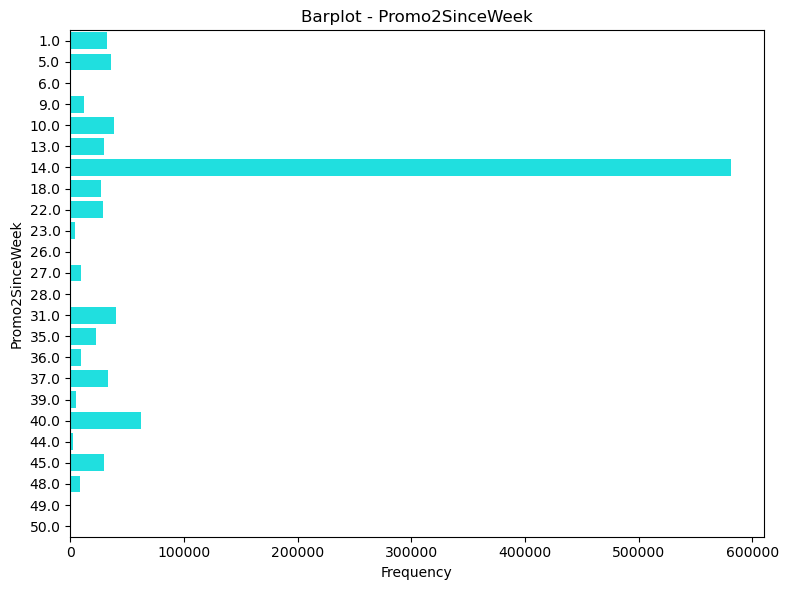

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(y="Promo2SinceWeek", data=data, color="cyan")
plt.title("Barplot - Promo2SinceWeek")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceWeek")
plt.tight_layout()
plt.show()

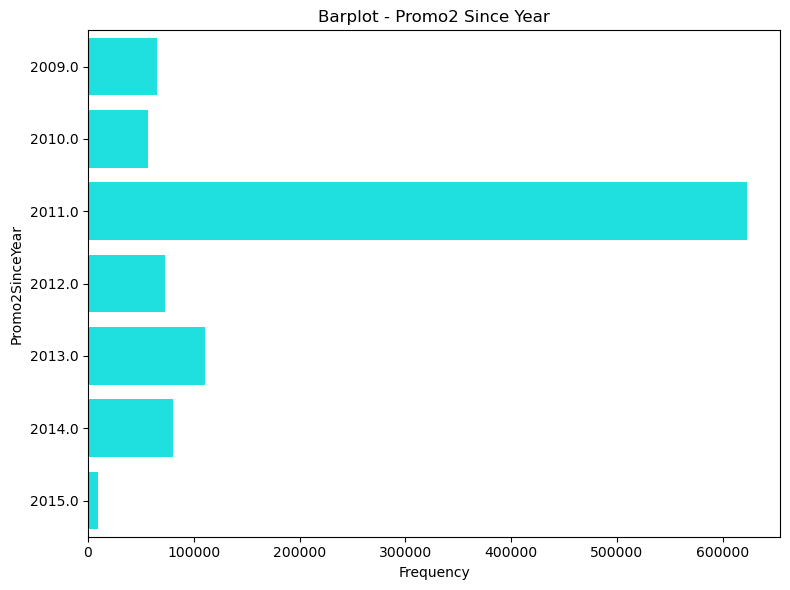

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(y="Promo2SinceYear", data=data,color="cyan")
plt.title("Barplot - Promo2 Since Year")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceYear")
plt.tight_layout()
plt.show()

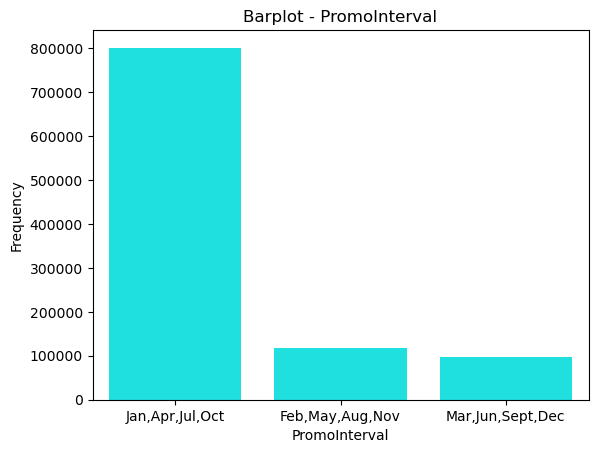

In [64]:
sns.countplot(x="PromoInterval", data=data,color="cyan")
plt.title("Barplot - PromoInterval")
plt.xlabel("PromoInterval")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Pie Chart-PromoInterval')

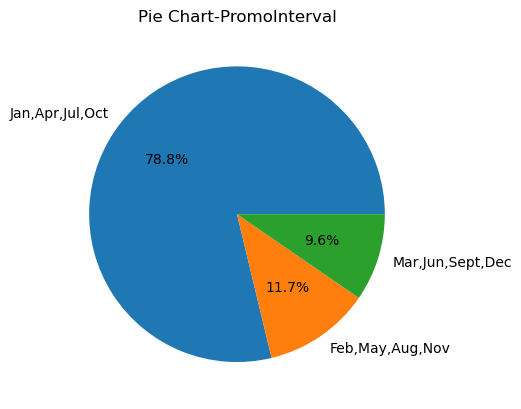

In [65]:
promo_counts=data['PromoInterval'].value_counts()
plt.pie(promo_counts,labels=promo_counts.index,autopct='%1.1f%%')
plt.title("Pie Chart-PromoInterval")

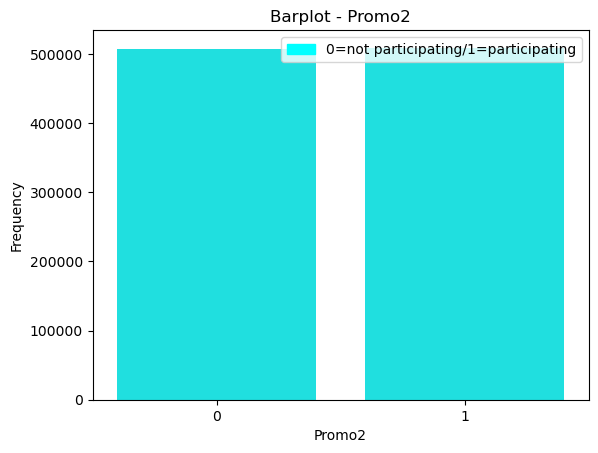

In [66]:
sns.countplot(x="Promo2", data=data,color="cyan")
plt.title("Barplot - Promo2")
plt.xlabel("Promo2")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=not participating/1=participating")]
plt.legend(handles=custom_legend, title="")
plt.show()

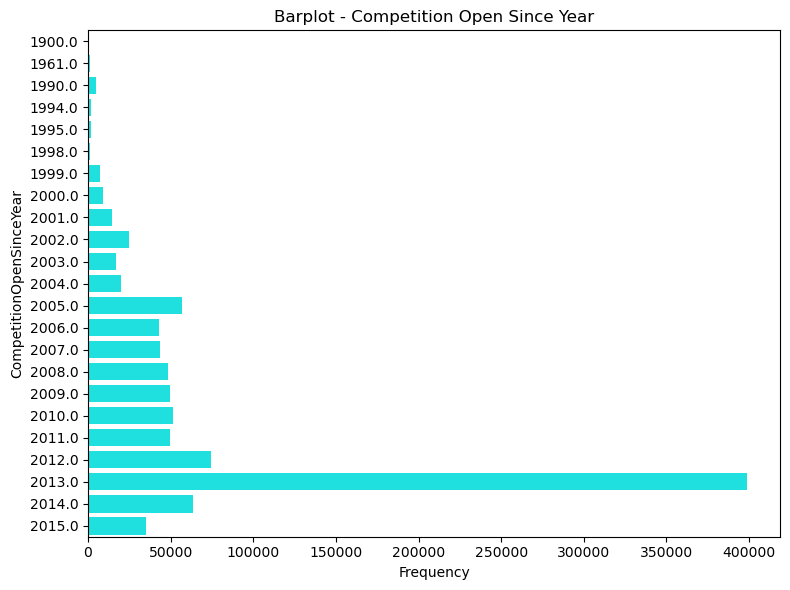

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(y="CompetitionOpenSinceYear", data=data, color="cyan")
plt.title("Barplot - Competition Open Since Year")
plt.xlabel("Frequency")
plt.ylabel("CompetitionOpenSinceYear")
plt.tight_layout()
plt.show()

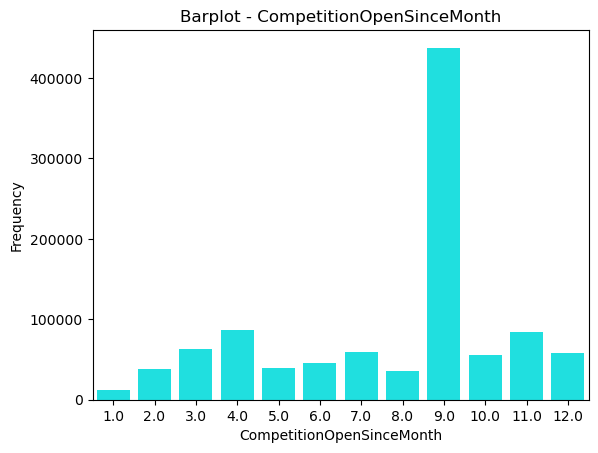

In [68]:

sns.countplot(x="CompetitionOpenSinceMonth", data=data,color="cyan")
plt.title("Barplot - CompetitionOpenSinceMonth")
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("Frequency")
plt.show()

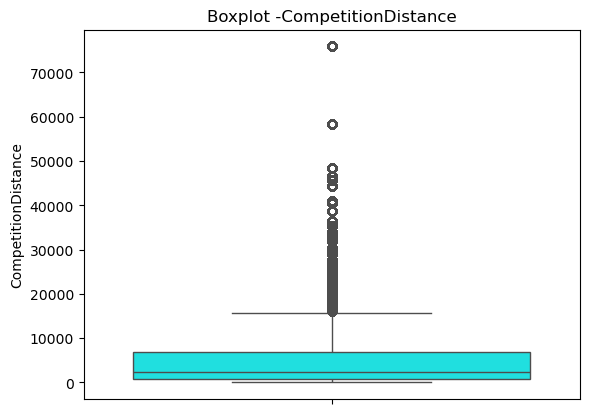

In [69]:
sns.boxplot(y="CompetitionDistance", data=data, color="cyan")
plt.title("Boxplot -CompetitionDistance")
plt.ylabel("CompetitionDistance")
plt.show()

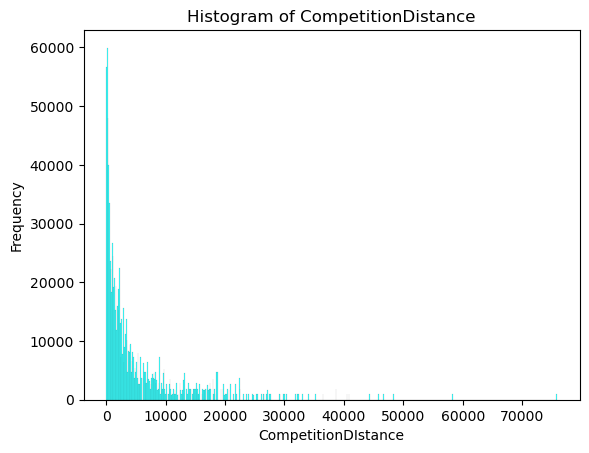

In [70]:
sns.histplot(data=data, x="CompetitionDistance",color="Cyan")
plt.title("Histogram of CompetitionDistance")
plt.xlabel("CompetitionDIstance")
plt.ylabel("Frequency")
plt.show()

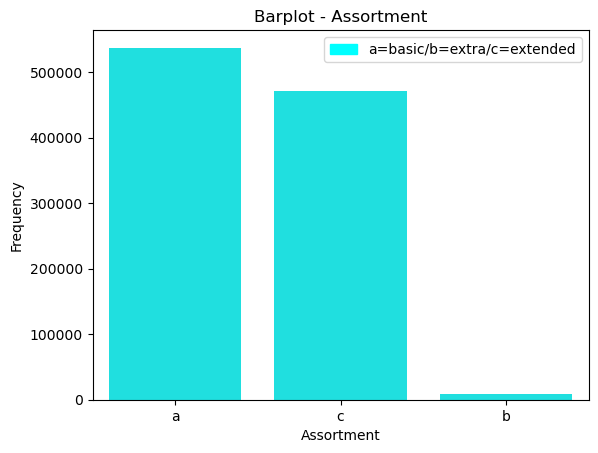

In [71]:
sns.countplot(x="Assortment", data=data,color="cyan")
plt.title("Barplot - Assortment")
plt.xlabel("Assortment")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")
plt.show()

Text(0.5, 1.0, 'Pie Chart-Assortment')

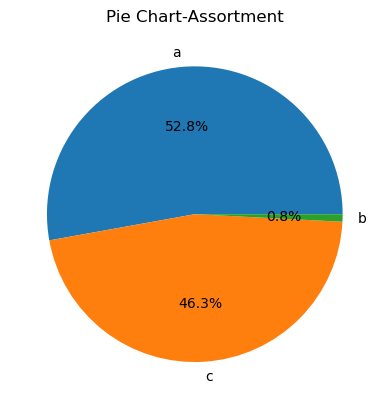

In [72]:
a=data['Assortment'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.1f%%')
plt.title("Pie Chart-Assortment")

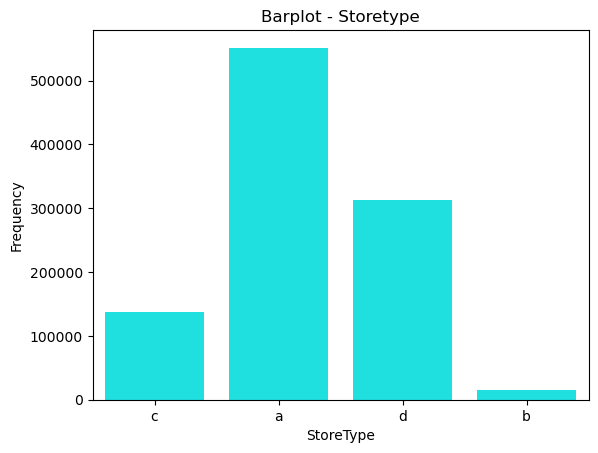

In [73]:
sns.countplot(x="StoreType", data=data,color="cyan")
plt.title("Barplot - Storetype")
plt.xlabel("StoreType")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Pie Chart-StoreTypes')

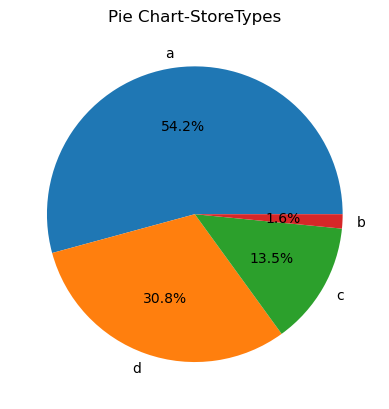

In [74]:
st=data['StoreType'].value_counts()
plt.pie(st,labels=st.index,autopct='%1.1f%%')
plt.title("Pie Chart-StoreTypes")

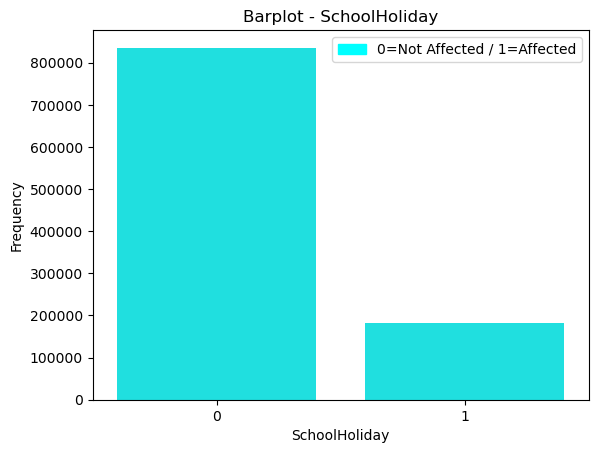

In [75]:
sns.countplot(x="SchoolHoliday", data=data,color="cyan")
plt.title("Barplot - SchoolHoliday")
plt.xlabel("SchoolHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=Not Affected / 1=Affected")]
plt.legend(handles=custom_legend, title="")
plt.show()

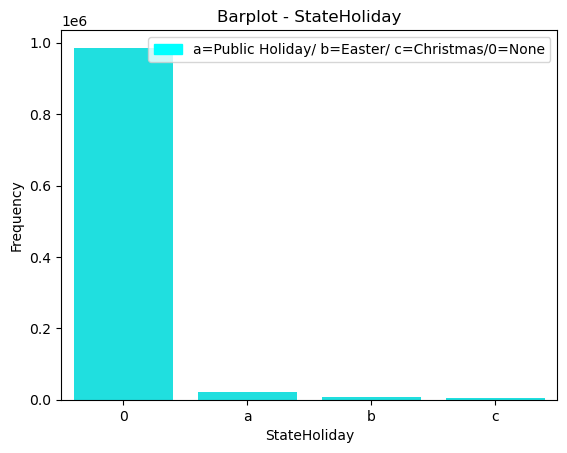

In [76]:
sns.countplot(x="StateHoliday", data=data,color="cyan")
plt.title("Barplot - StateHoliday")
plt.xlabel("StateHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")
plt.show()

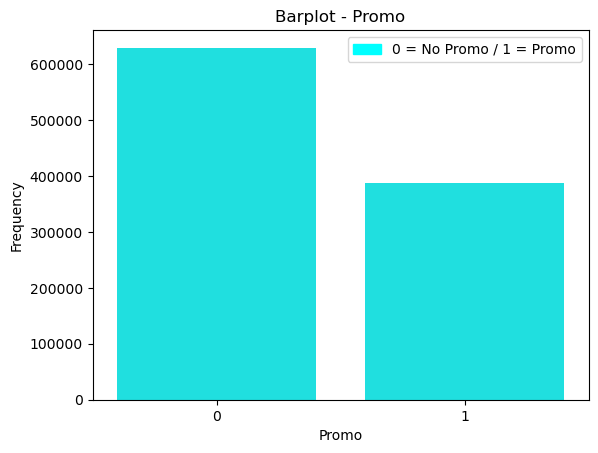

In [77]:
sns.countplot(x="Promo", data=data, color="cyan")
plt.title("Barplot - Promo")
plt.xlabel("Promo")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = No Promo / 1 = Promo")]
plt.legend(handles=custom_legend, title="")
plt.show()

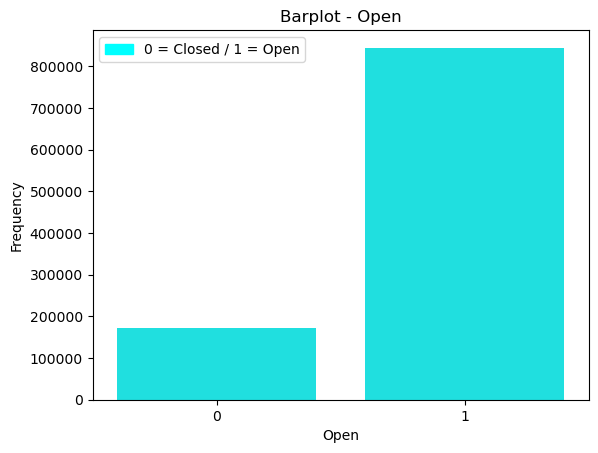

In [78]:
sns.countplot(x="Open", data=data, color="cyan")
plt.title("Barplot - Open")
plt.xlabel("Open")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = Closed / 1 = Open")]
plt.legend(handles=custom_legend, title="")
plt.show()

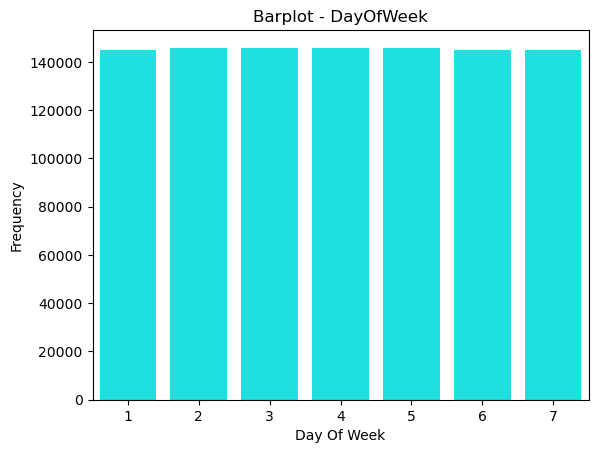

In [79]:
sns.countplot(x="DayOfWeek", data=data, color="cyan")
plt.title("Barplot - DayOfWeek")
plt.xlabel("Day Of Week")
plt.ylabel("Frequency")
plt.show()

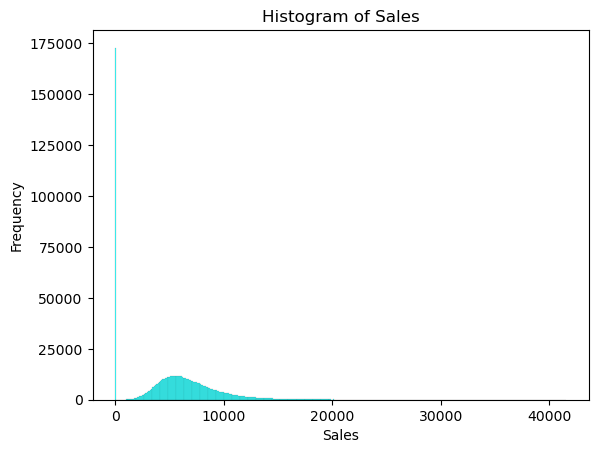

In [80]:
#Some stores were temporarily closed for refurbishment!
sns.histplot(data=data, x="Sales",color="Cyan")
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

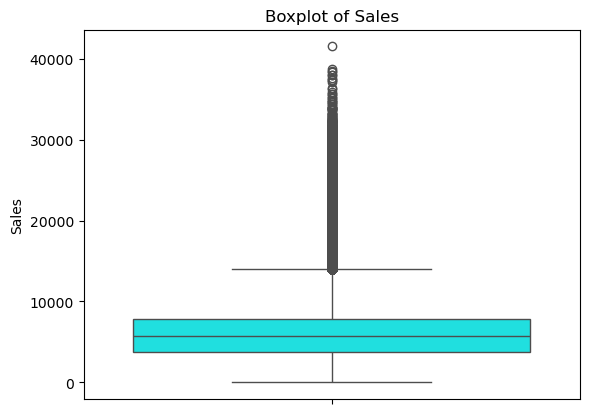

In [81]:
sns.boxplot(y="Sales", data=data, color="cyan")
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

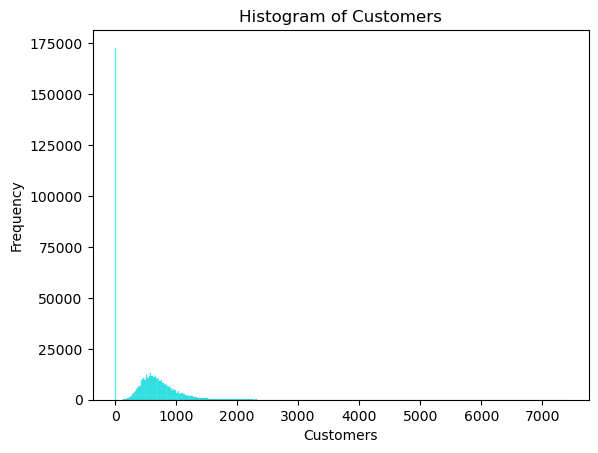

In [82]:
sns.histplot(data=data, x="Customers",color="Cyan")
plt.title("Histogram of Customers")
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.show()

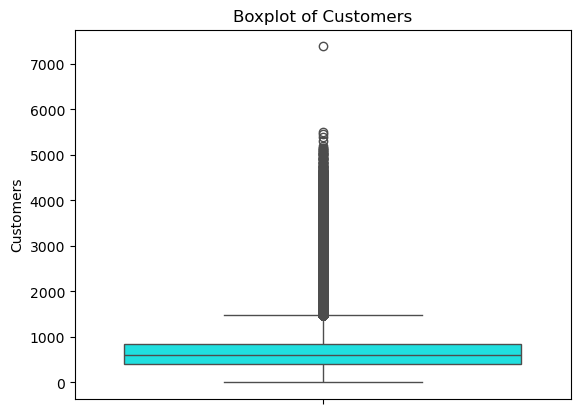

In [83]:
sns.boxplot(y="Customers", data=data, color="cyan")
plt.title("Boxplot of Customers")
plt.ylabel("Customers")
plt.show()

# Correlation between variables

In [84]:
#Sales~Customers
print(data["Sales"].corr(data["Customers"], method='pearson'),
data["Sales"].corr(data["Customers"], method='spearman'),
data["Sales"].corr(data["Customers"], method='kendall'))

0.8946977306504313 0.9033304972203227 0.7463438699359183


Text(0, 0.5, 'Customers')

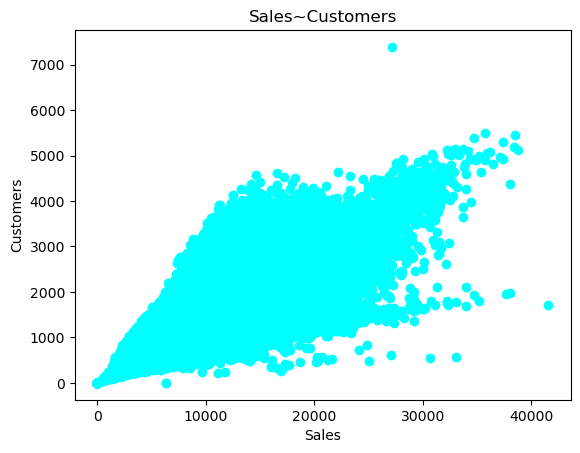

In [85]:
plt.scatter(data["Sales"], data["Customers"],color="cyan")
plt.title("Sales~Customers")
plt.xlabel("Sales")
plt.ylabel("Customers")


### Assumptions:
### Normality of residuals
### Homoscedasticity 
### Linearity
### Outliers
### Independence

### If model assumptions are not met then we use Kendall & Spearman methods for correlation

In [86]:
#library
import statsmodels.formula.api as smf

In [87]:
#model sales~customers
model1=smf.ols("Sales~Customers",data=data).fit()
print(model1.summary())

#Jarque-Bera normality test (n>2000) indicates that residulas are not normally distributed 
#We have many outliers in Sales & Customers 
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 4.081e+06
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        16:51:27   Log-Likelihood:            -9.0214e+06
No. Observations:             1017209   AIC:                         1.804e+07
Df Residuals:                 1017207   BIC:                         1.804e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1077.9421      2.883    373.916      0.0

In [88]:
#Sales~CompetitionDistance
print(data["Sales"].corr(data["CompetitionDistance"], method='pearson'),
data["Sales"].corr(data["CompetitionDistance"], method='spearman'),
data["Sales"].corr(data["CompetitionDistance"], method='kendall'))

-0.018901990568970007 -0.024190048333857895 -0.015721429623566426


Text(0, 0.5, 'CompetitionDistance')

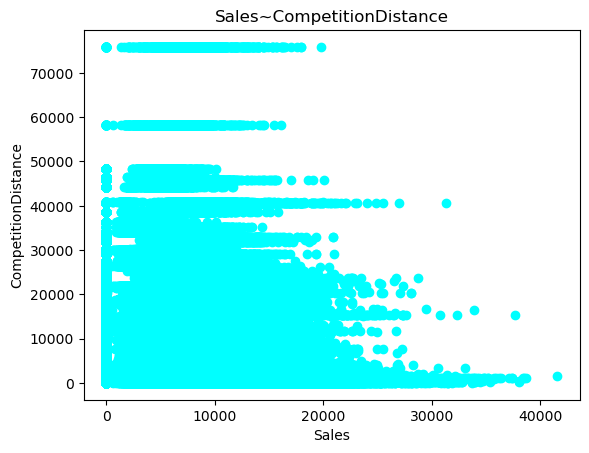

In [89]:
plt.scatter(data["Sales"], data["CompetitionDistance"],color="cyan")
plt.title("Sales~CompetitionDistance")
plt.xlabel("Sales")
plt.ylabel("CompetitionDistance")

In [90]:
#model Sales~CompetitionDistance
model2=smf.ols("Sales~CompetitionDistance",data=data).fit()
print(model2.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Sales & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     363.6
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.87e-81
Time:                        16:51:30   Log-Likelihood:            -9.8410e+06
No. Observations:             1017209   AIC:                         1.968e+07
Df Residuals:                 1017207   BIC:                         1.968e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5825.3507    

In [91]:
#Customers~CompetitionDistance
print(data["Customers"].corr(data["CompetitionDistance"], method='pearson'),
data["Customers"].corr(data["CompetitionDistance"], method='spearman'),
data["Customers"].corr(data["CompetitionDistance"], method='kendall'))

-0.10239354680187586 -0.1769468031123368 -0.11922518432675475


Text(0, 0.5, 'CompetitionDistance')

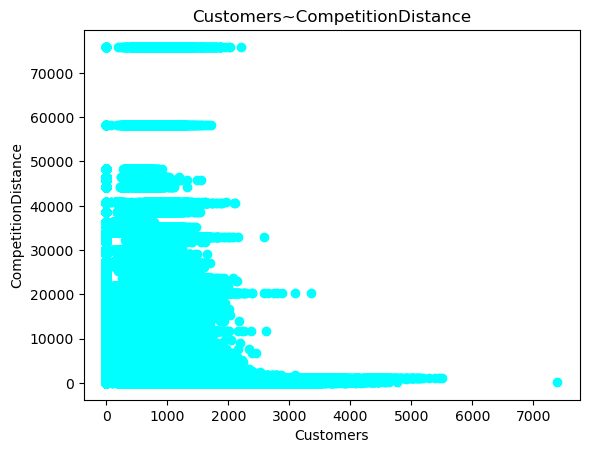

In [92]:
plt.scatter(data["Customers"], data["CompetitionDistance"],color="cyan")
plt.title("Customers~CompetitionDistance")
plt.xlabel("Customers")
plt.ylabel("CompetitionDistance")

In [93]:
#model Customers~CompetitionDistance
model3=smf.ols("Customers~CompetitionDistance",data=data).fit()
print(model3.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Customers & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:              Customers   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        16:51:32   Log-Likelihood:            -7.6844e+06
No. Observations:             1017209   AIC:                         1.537e+07
Df Residuals:                 1017207   BIC:                         1.537e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             666.6337    

### Cor for categorical~categorical
### X^2 test with H0: No relationship vs H1:There is relationship 
### a=5%

In [94]:
#PROMO~SCHOOLHOLIDAY
from scipy import stats
table=pd.crosstab(data['Promo'],data['SchoolHoliday'])
chi_stat, p_value, df, expected = stats.chi2_contingency(table)
print(p_value,chi_stat,expected)

#p-value<a so we reject H0
#School Holidays do not have impact whether a promo will take place or not

0.0 4631.935870089784 [[516737.19948604 112391.80051396]
 [318750.80051396  69329.19948604]]


In [95]:
#PROMO~STATEHOLIDAY
#data['Promo'] = data['Promo'].astype(str)
data['StateHoliday'] = data['StateHoliday'].astype(str)
table1 = pd.crosstab(data['Promo'], data['StateHoliday'])
chi_stat,p_val,df,expected_val=stats.chi2_contingency(table1)
print(p_val,chi_stat)

#State Holidays do not have impact whether a promo will take place or not

0.0 2948.087398538137


### Non parametric Wilcoxon test for sales~promo & promo2 
### H0:There aren't differences between the mean values VS H1:Not H0


In [96]:
from scipy.stats import mannwhitneyu

#promo
promo_sales_yes=data[data['Promo']==1]['Sales']  
promo_sales_no=data[data['Promo']==0]['Sales'] 

#promo2
promo2_sales_yes=data[data['Promo2']==1]['Sales']  
promo2_sales_no=data[data['Promo2']==0]['Sales'] 

#Wilcoxon Test
w_stat_promo, p_value_promo = mannwhitneyu(promo_sales_yes, promo_sales_no)
print(w_stat_promo,p_value_promo)
w_stat_promo2,p_value_promo2 = mannwhitneyu(promo2_sales_yes, promo2_sales_no)
print(w_stat_promo2,p_value_promo2)

192939092246.5 0.0
116535552120.5 0.0


## Multivariate Analysis 

In [97]:
#cut date
#data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') 
#data['year'] = data['Date'].dt.year
#data['month'] = data['Date'].dt.month
#data['day'] = data['Date'].dt.day

In [98]:
sns.boxplot(x='year',y='Sales',data=data,color="cyan")
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

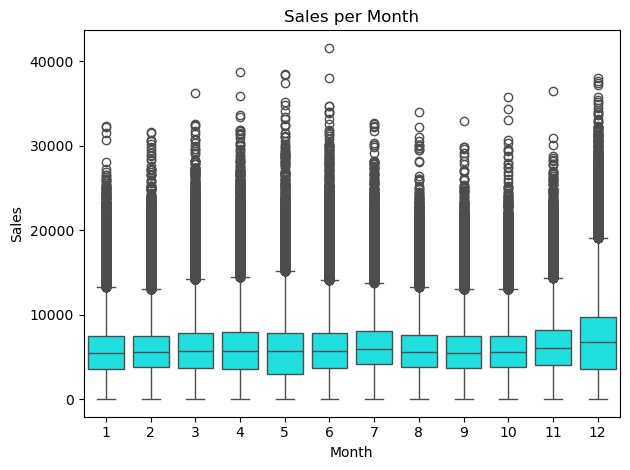

In [ ]:
sns.boxplot(x='month',y='Sales',data=data,color="cyan")
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Dates with most sales
top_sales=data.sort_values(by='Sales',ascending=False).head(10) 
print(top_sales[['Date', 'Sales', 'Promo', 'StateHoliday', 'SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek"]])

              Date  Sales Promo StateHoliday SchoolHoliday Promo2 StoreType  \
44393   2015-06-22  41551     0            0             0      1         a   
132946  2015-04-03  38722     1            b             0      0         b   
101726  2015-05-01  38484     1            a             0      0         b   
87231   2015-05-14  38367     0            a             1      0         b   
424086  2014-06-16  38037     1            0             0      0         d   
627776  2013-12-16  38025     1            0             0      0         a   
627220  2013-12-16  37646     1            0             0      1         d   
444361  2014-05-29  37403     0            a             0      0         b   
620531  2013-12-22  37376     0            0             0      0         b   
245945  2014-12-21  37122     0            0             0      0         b   

       Assortment DayOfWeek  
44393           c         1  
132946          a         5  
101726          a         5  
87231     

In [ ]:
#Tables with frequencies for big sales
print(top_sales['Promo'].value_counts()/100)
print(top_sales['StateHoliday'].value_counts())
print(top_sales['SchoolHoliday'].value_counts())
print(top_sales['Promo2'].value_counts())
print(top_sales['StoreType'].value_counts())
print(top_sales['Assortment'].value_counts())

Promo
0    0.05
1    0.05
Name: count, dtype: float64
StateHoliday
0    6
a    3
b    1
Name: count, dtype: int64
SchoolHoliday
0    9
1    1
Name: count, dtype: int64
Promo2
0    8
1    2
Name: count, dtype: int64
StoreType
b    6
a    2
d    2
Name: count, dtype: int64
Assortment
a    7
c    3
Name: count, dtype: int64


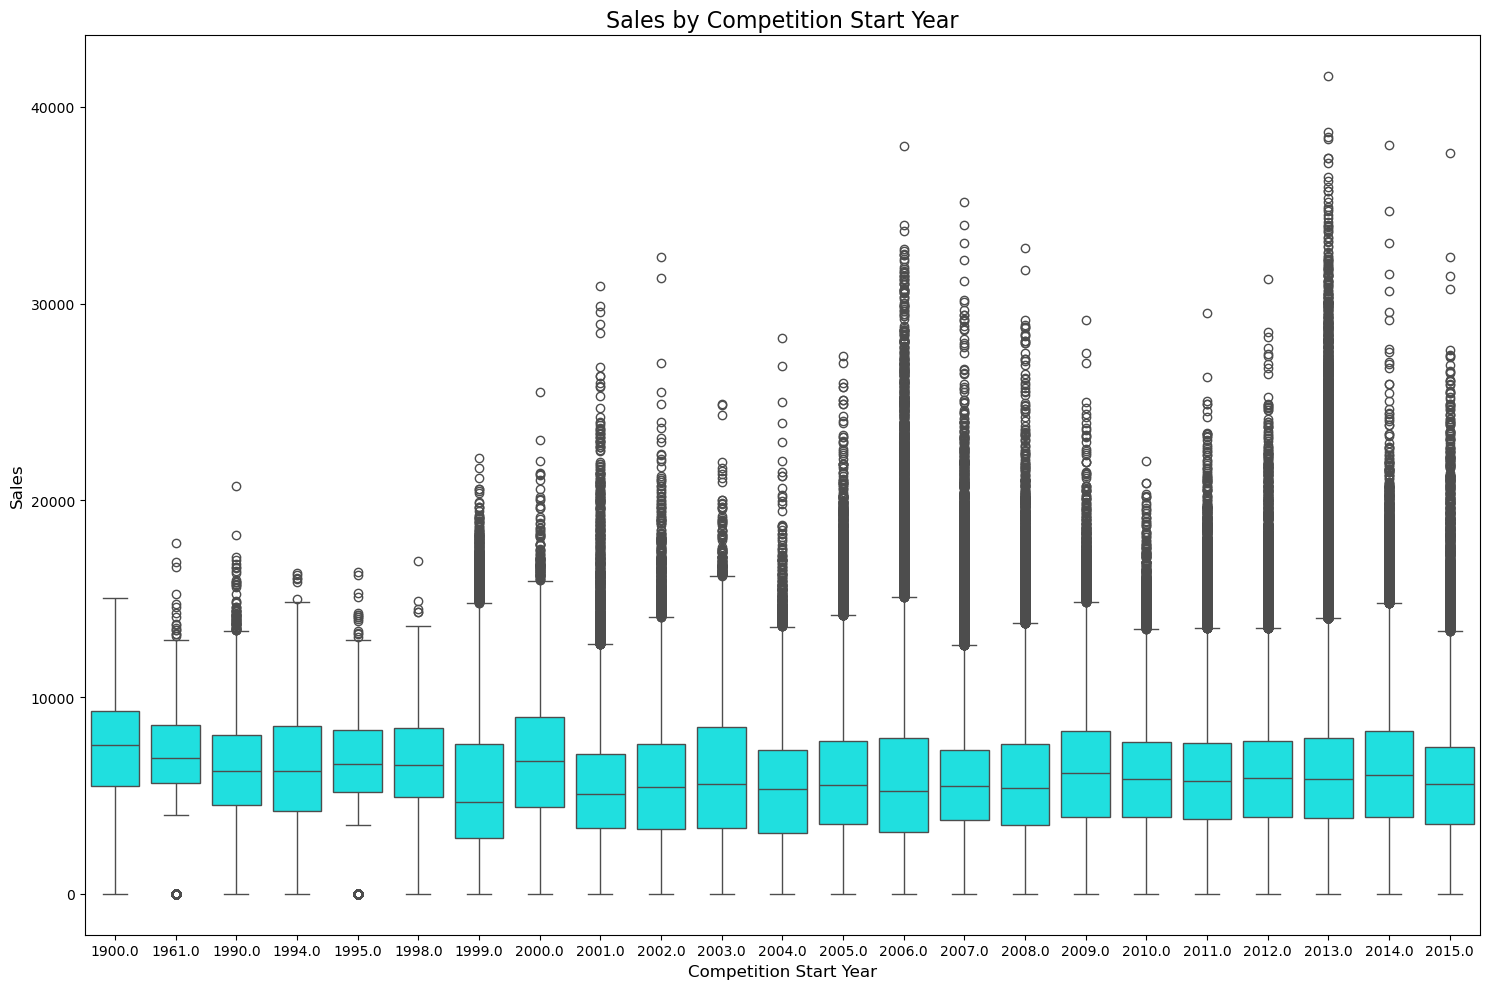

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceYear', y='Sales',color="cyan")
plt.title('Sales by Competition Start Year', fontsize=16)
plt.xlabel('Competition Start Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

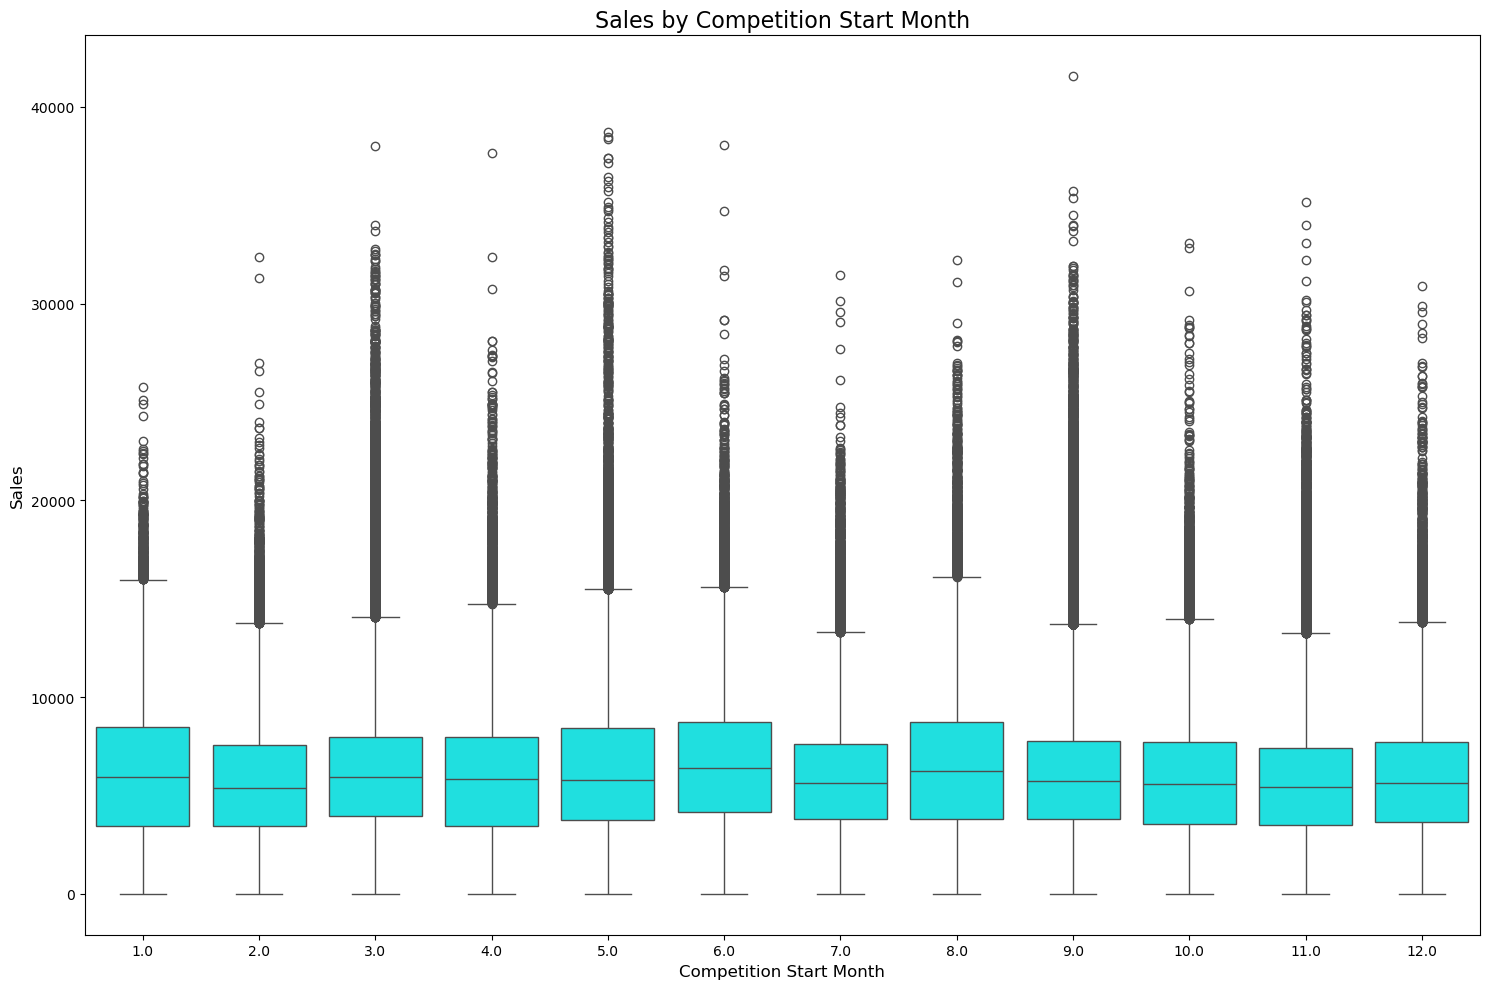

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceMonth', y='Sales',color="cyan")
plt.title('Sales by Competition Start Month', fontsize=16)
plt.xlabel('Competition Start Month',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sales based on PromotionInterval')

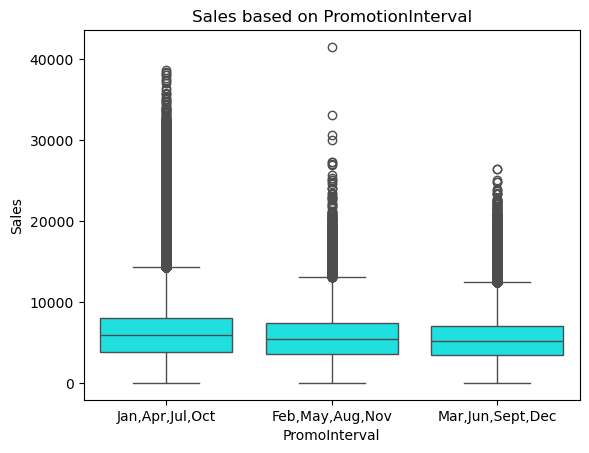

In [ ]:
sns.boxplot(data=data, x='PromoInterval', y='Sales',color="cyan")
plt.title("Sales based on PromotionInterval")

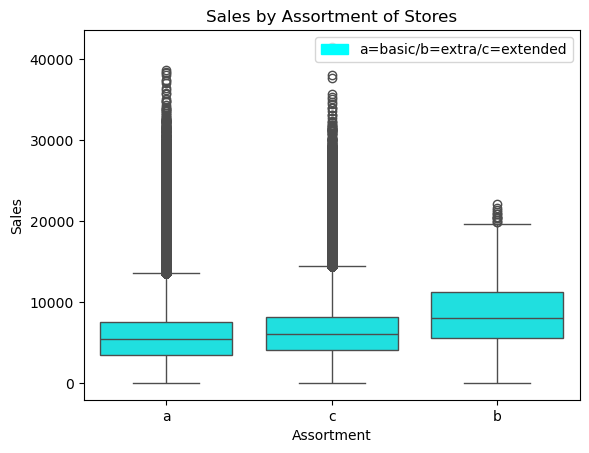

In [ ]:
sns.boxplot(data=data, x='Assortment', y='Sales',color="cyan")
plt.title("Sales by Assortment of Stores")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")

Text(0.5, 1.0, 'Sales by Type of The Store')

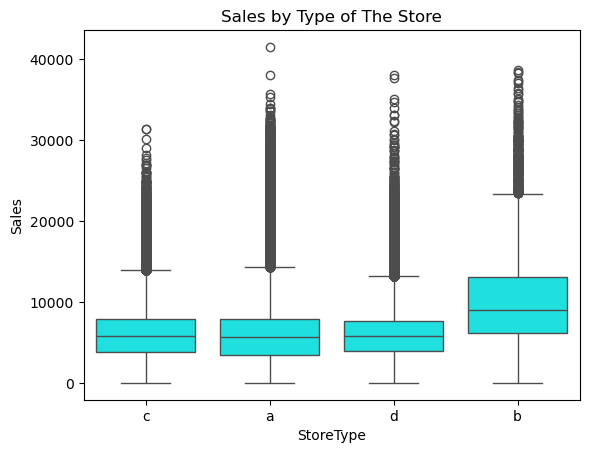

In [ ]:
sns.boxplot(data=data, x='StoreType', y='Sales',color="cyan")
plt.title("Sales by Type of The Store")

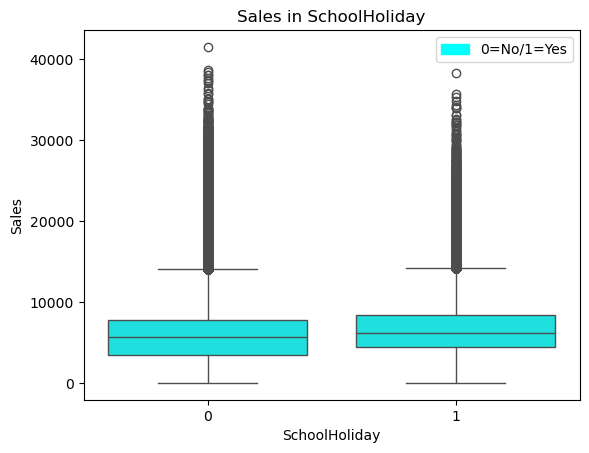

In [ ]:
sns.boxplot(data=data, x='SchoolHoliday', y='Sales',color="cyan")
plt.title("Sales in SchoolHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=No/1=Yes")]
plt.legend(handles=custom_legend, title="")

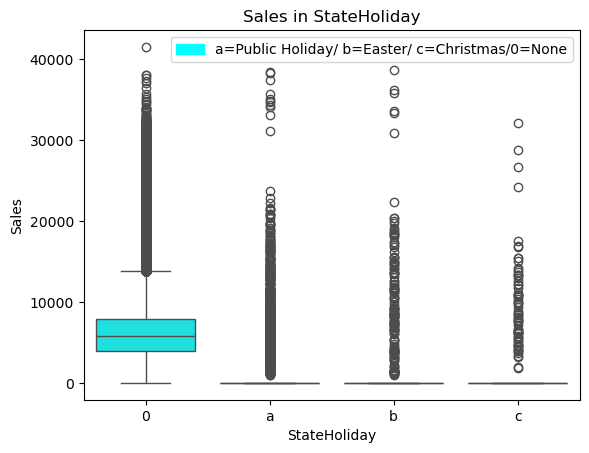

In [ ]:
sns.boxplot(data=data, x='StateHoliday', y='Sales',color="cyan")
plt.title("Sales in StateHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")

Text(0.5, 1.0, 'Sales per Day')

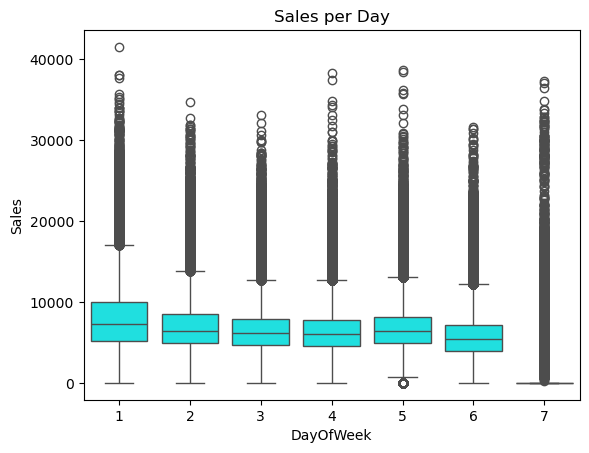

In [ ]:
sns.boxplot(data=data, x='DayOfWeek', y='Sales',color="cyan")
plt.title("Sales per Day")

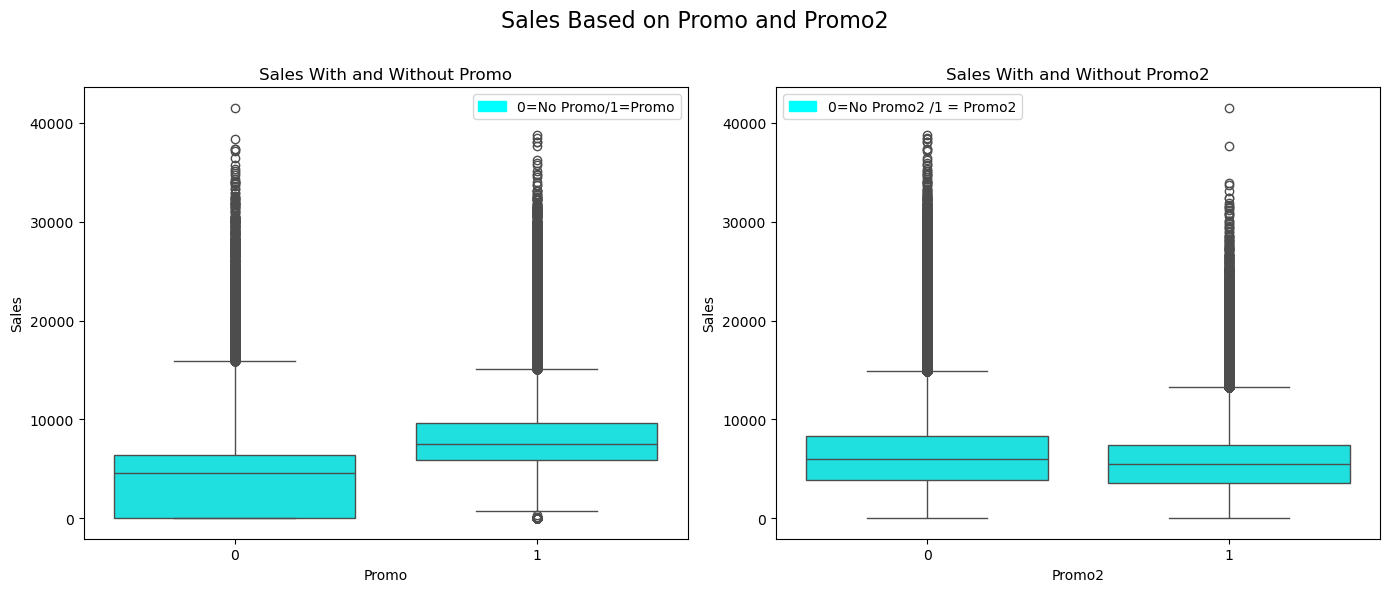

In [ ]:
fig,ax=plt.subplots(1, 2,figsize=(14, 6))
sns.boxplot(data=data,x='Promo',y='Sales',color="cyan",ax=ax[0])
ax[0].set_title("Sales With and Without Promo")
custom_legend_1=[Patch(color="cyan",label="0=No Promo/1=Promo")]
ax[0].legend(handles=custom_legend_1, title="")

sns.boxplot(data=data,x='Promo2',y='Sales',color="cyan",ax=ax[1])
ax[1].set_title("Sales With and Without Promo2")
custom_legend_2=[Patch(color="cyan",label="0=No Promo2 /1 = Promo2")]
ax[1].legend(handles=custom_legend_2, title="")

plt.suptitle("Sales Based on Promo and Promo2", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

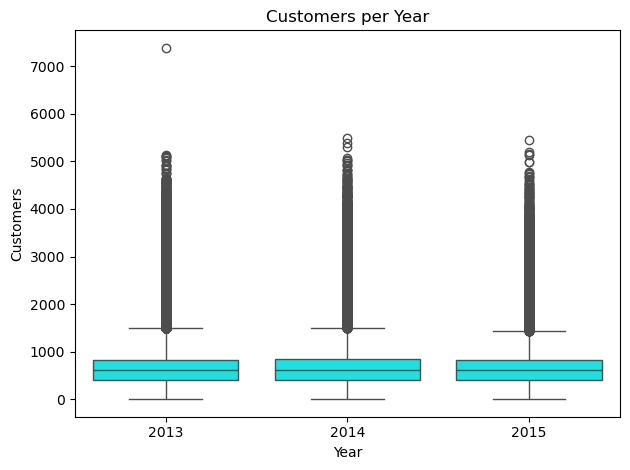

In [ ]:
sns.boxplot(x='year',y='Customers',data=data,color="cyan")
plt.title('Customers per Year')
plt.xlabel('Year')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

In [ ]:
sns.boxplot(x='month',y='Customers',data=data,color="cyan")
plt.title('Customers per Month')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.tight_layout()

ValueError: Could not interpret value `month` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Dates with most customers
top_customers=data.sort_values(by='Customers',ascending=False).head(10) 
print(top_customers[['Date', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek"]])

             Date  Customers Promo StateHoliday SchoolHoliday Promo2  \
993496 2013-01-22       7388     1            0             0      0   
319810 2014-10-03       5494     1            a             0      0   
101726 2015-05-01       5458     1            a             0      0   
432096 2014-06-09       5387     0            a             0      0   
444361 2014-05-29       5297     0            a             0      0   
87231  2015-05-14       5192     0            a             1      0   
129601 2015-04-06       5152     0            b             0      0   
745411 2013-09-01       5145     0            0             0      0   
132946 2015-04-03       5132     1            b             0      0   
776631 2013-08-04       5112     0            0             0      0   

       StoreType Assortment DayOfWeek  
993496         a          a         2  
319810         b          a         5  
101726         b          a         5  
432096         b          a         1  
444361 

In [ ]:
#Tables with frequencies for many customers
print(top_customers['Promo'].value_counts())
print(top_customers['StateHoliday'].value_counts())
print(top_customers['SchoolHoliday'].value_counts())
print(top_customers['Promo2'].value_counts())
print(top_customers['StoreType'].value_counts())
print(top_customers['Assortment'].value_counts())

NameError: name 'top_customers' is not defined

Text(0.5, 1.0, 'Customers per Day')

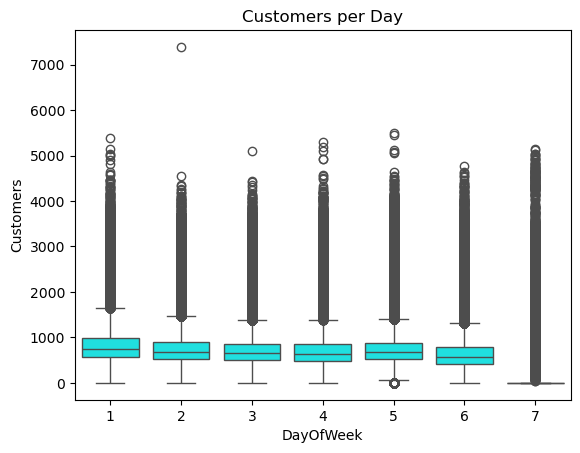

In [ ]:
sns.boxplot(data=data, x='DayOfWeek', y='Customers',color="cyan")
plt.title("Customers per Day")

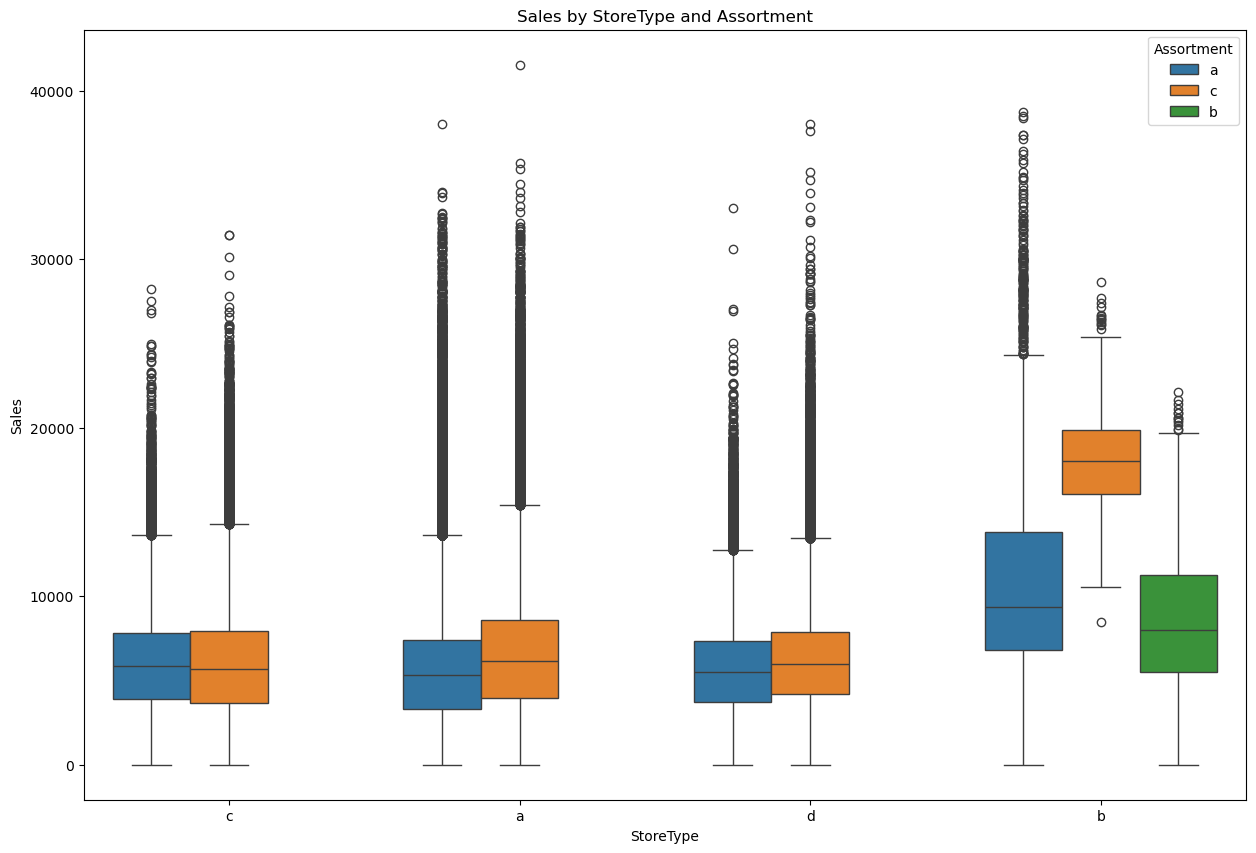

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Sales',hue='Assortment',data=data)
plt.title('Sales by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Assortment')

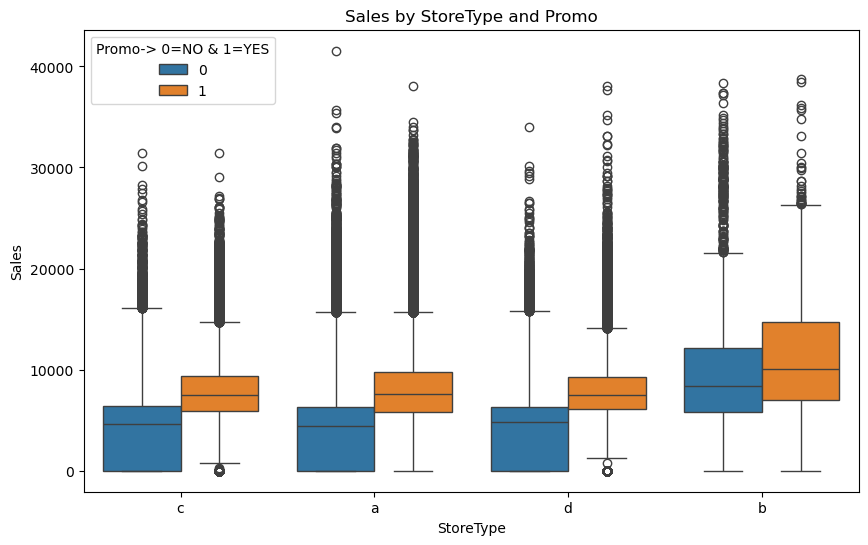

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo',data=data)
plt.title('Sales by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo-> 0=NO & 1=YES')

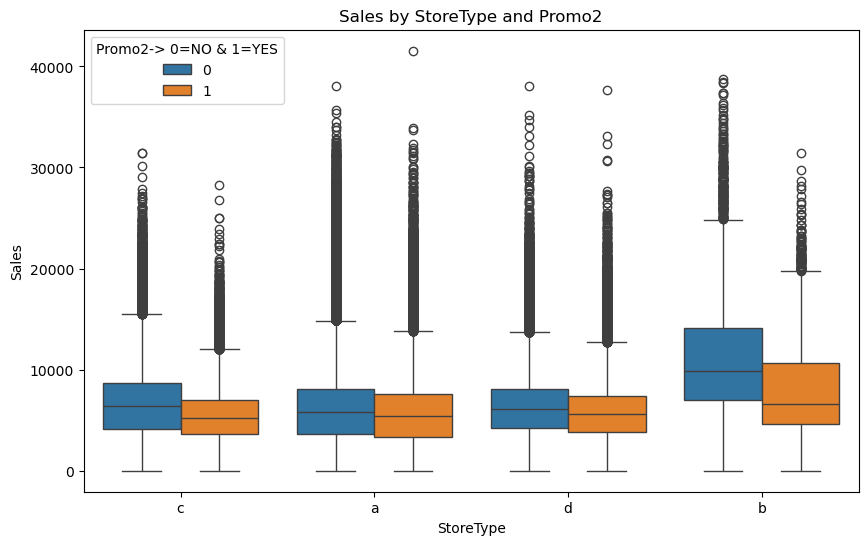

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo2',data=data)
plt.title('Sales by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo2-> 0=NO & 1=YES')

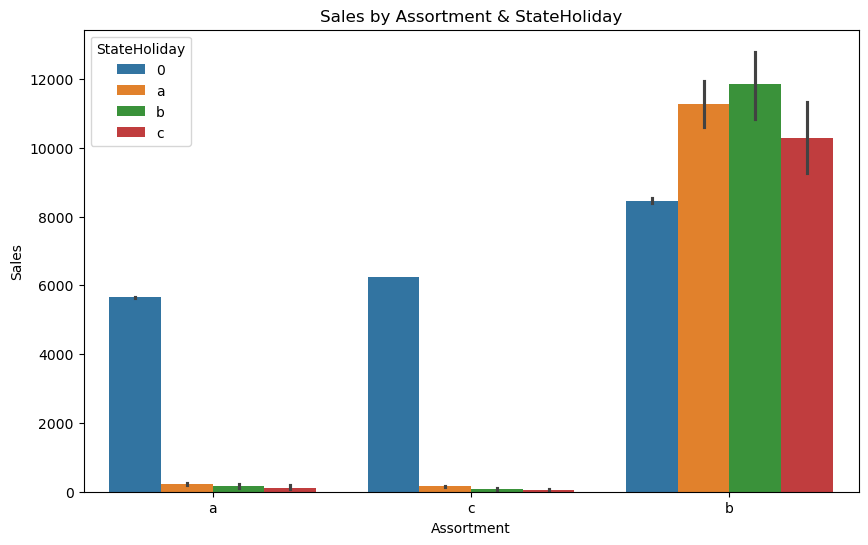

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by Assortment & StateHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='StateHoliday')

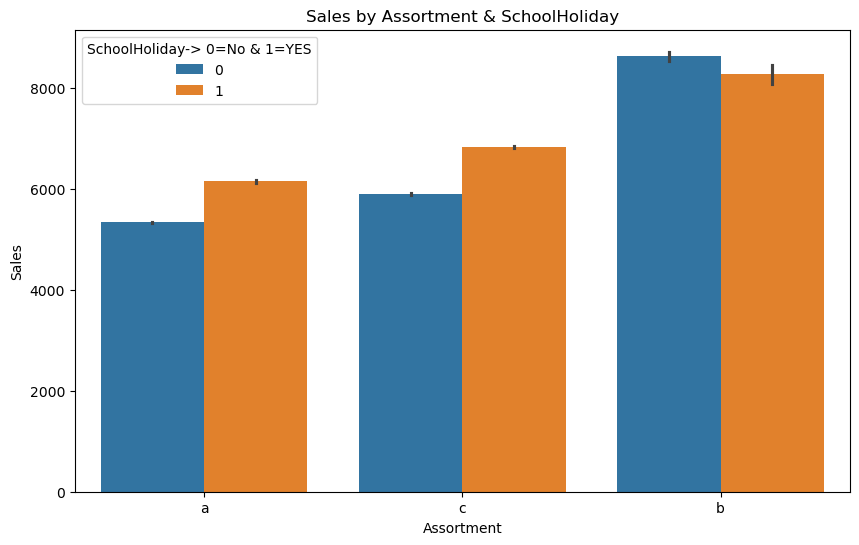

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by Assortment & SchoolHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday-> 0=No & 1=YES')

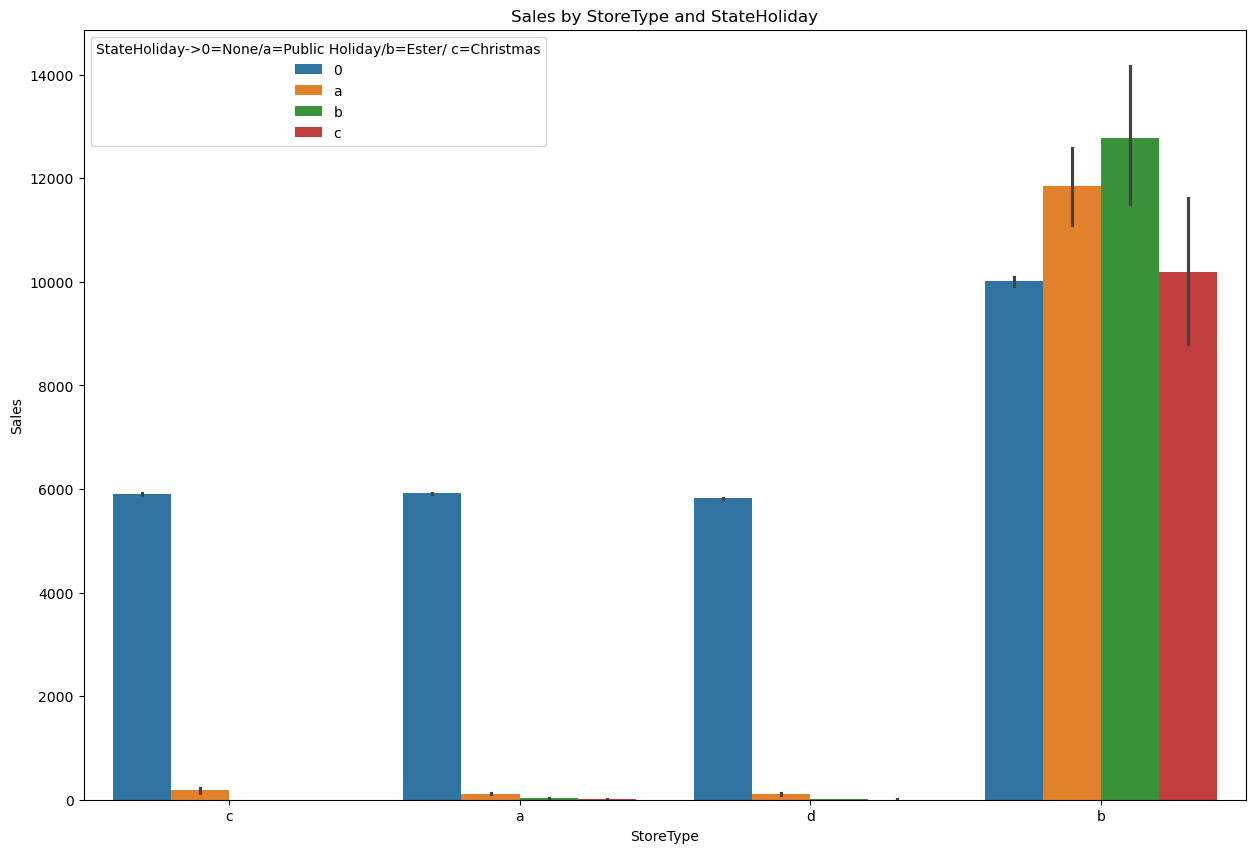

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='StateHoliday->0=None/a=Public Holiday/b=Ester/ c=Christmas')

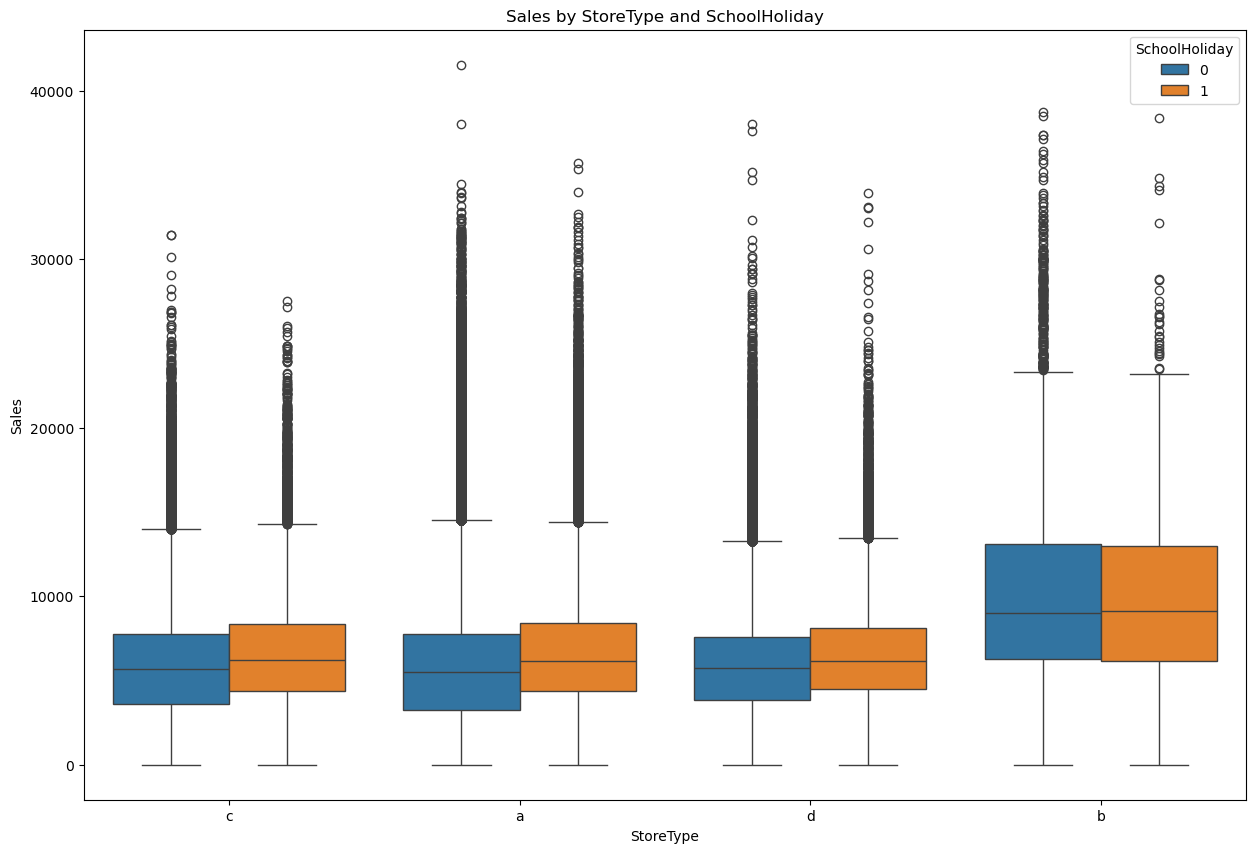

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday')

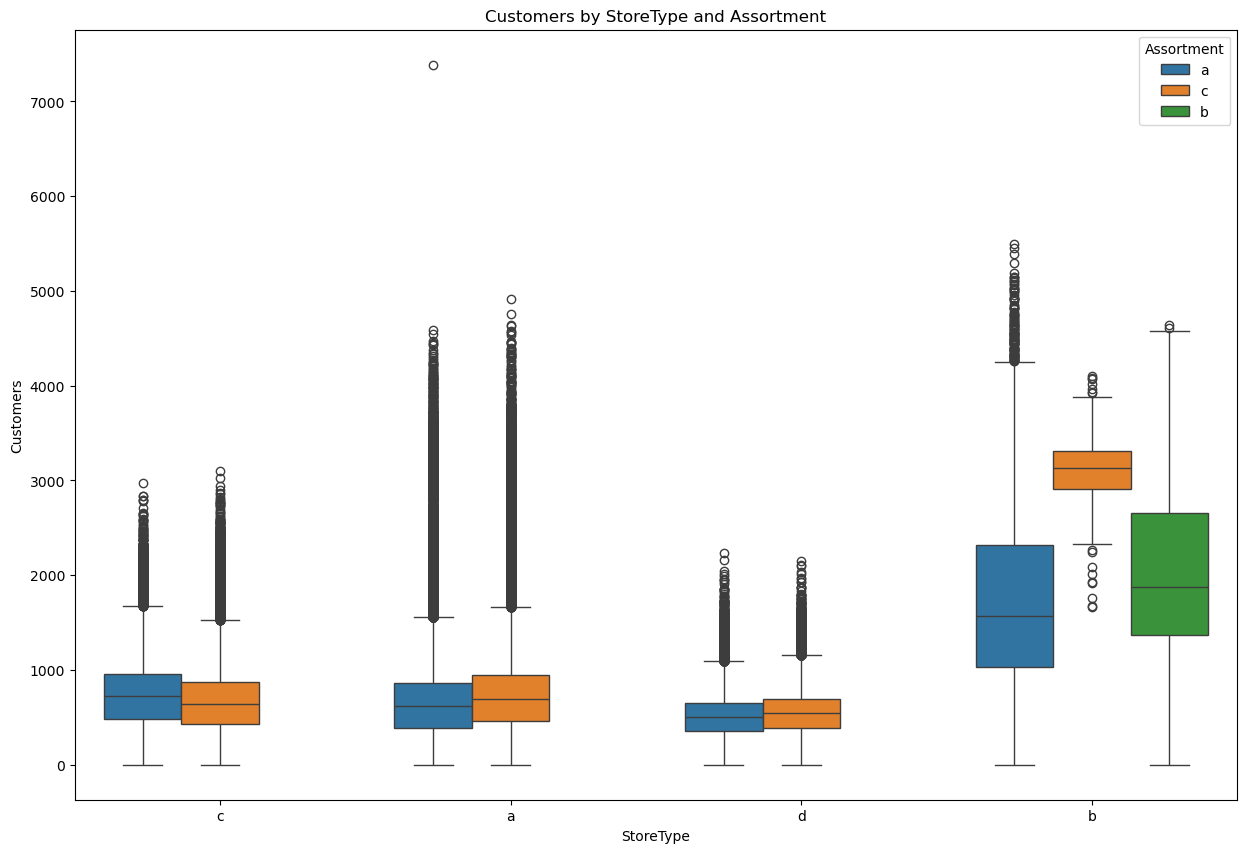

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Assortment',data=data)
plt.title('Customers by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Assortment')

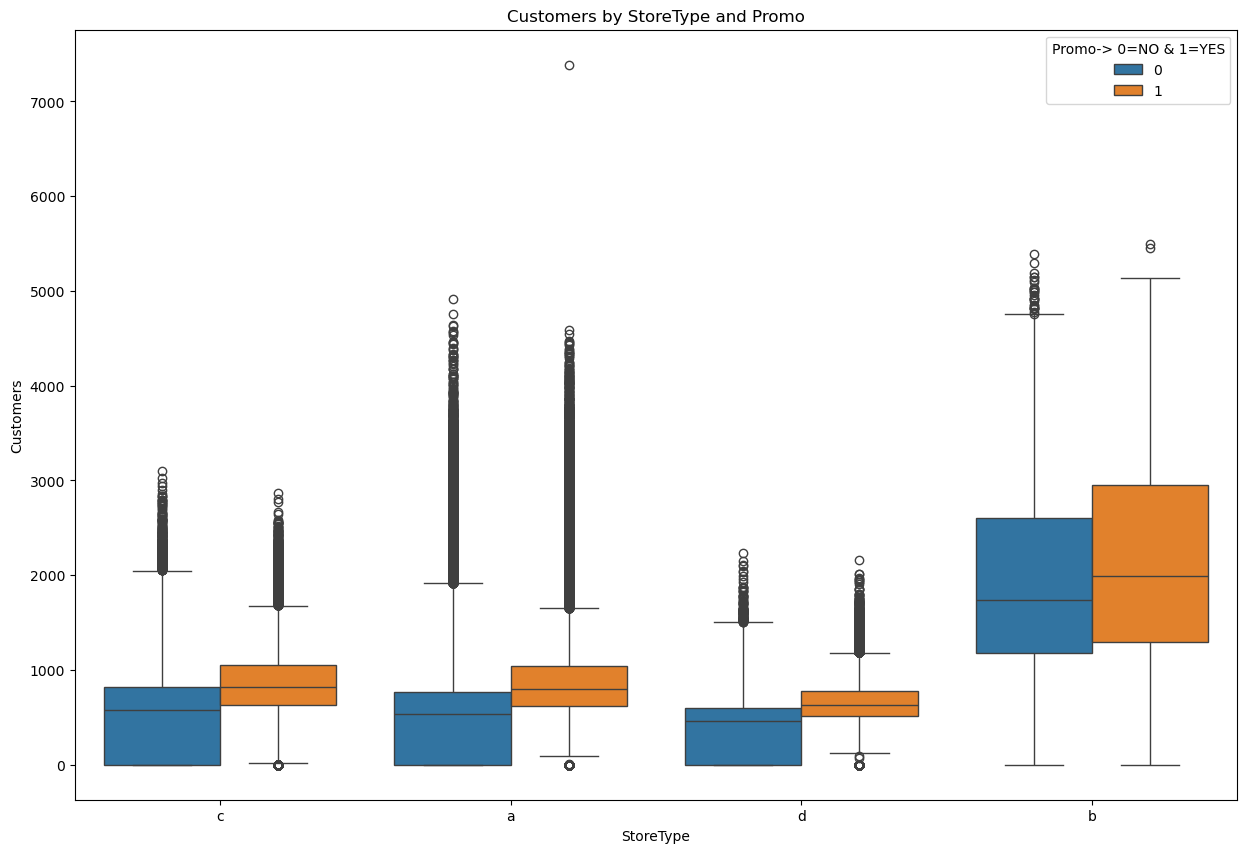

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo',data=data)
plt.title('Customers by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo-> 0=NO & 1=YES')

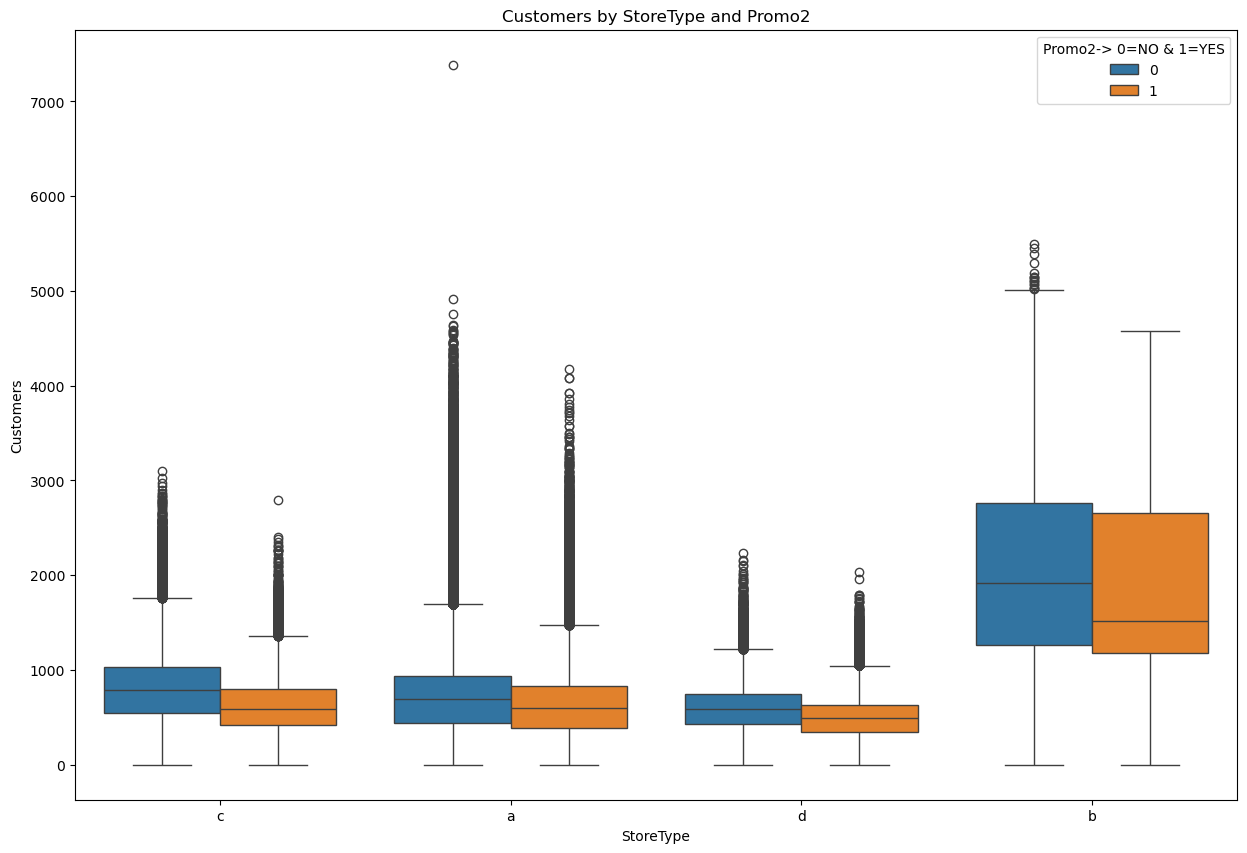

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo2',data=data)
plt.title('Customers by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo2-> 0=NO & 1=YES')

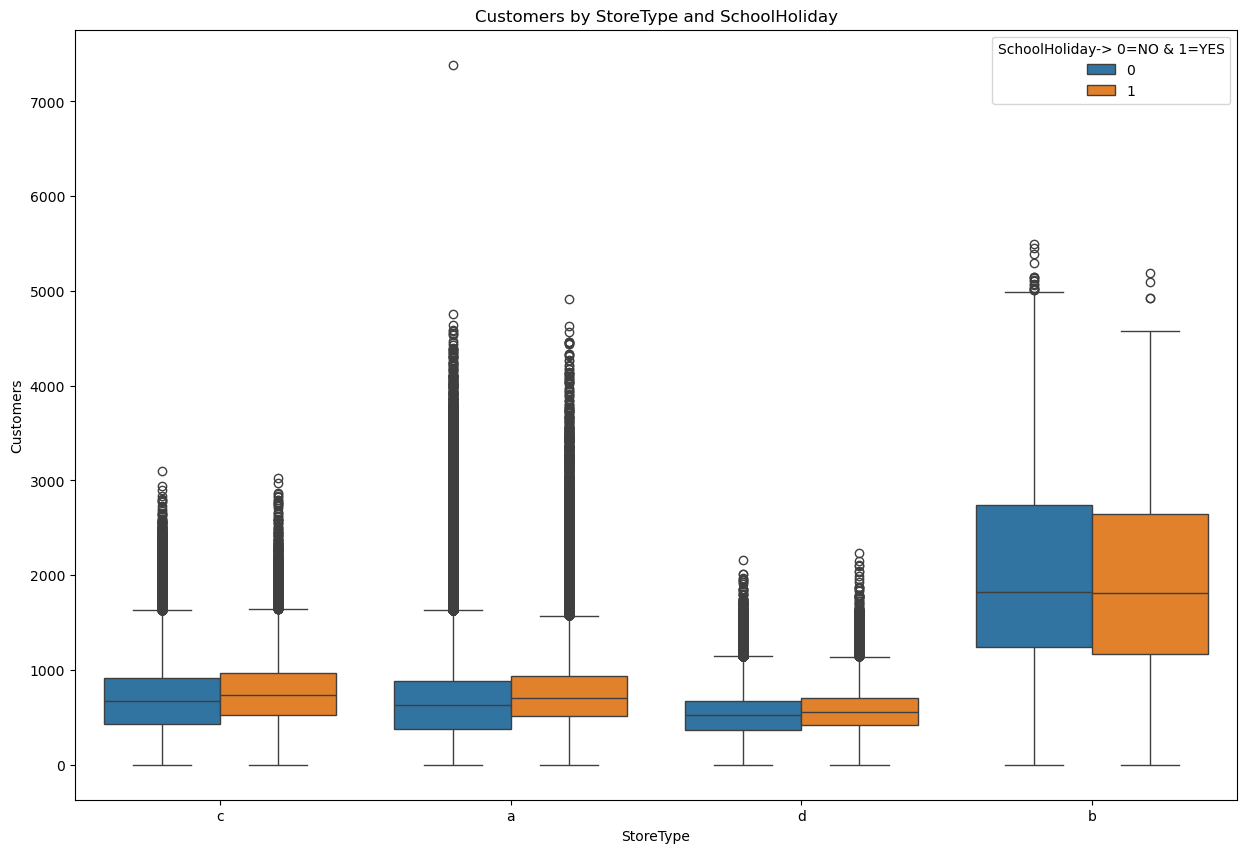

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='SchoolHoliday',data=data)
plt.title('Customers by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='SchoolHoliday-> 0=NO & 1=YES')

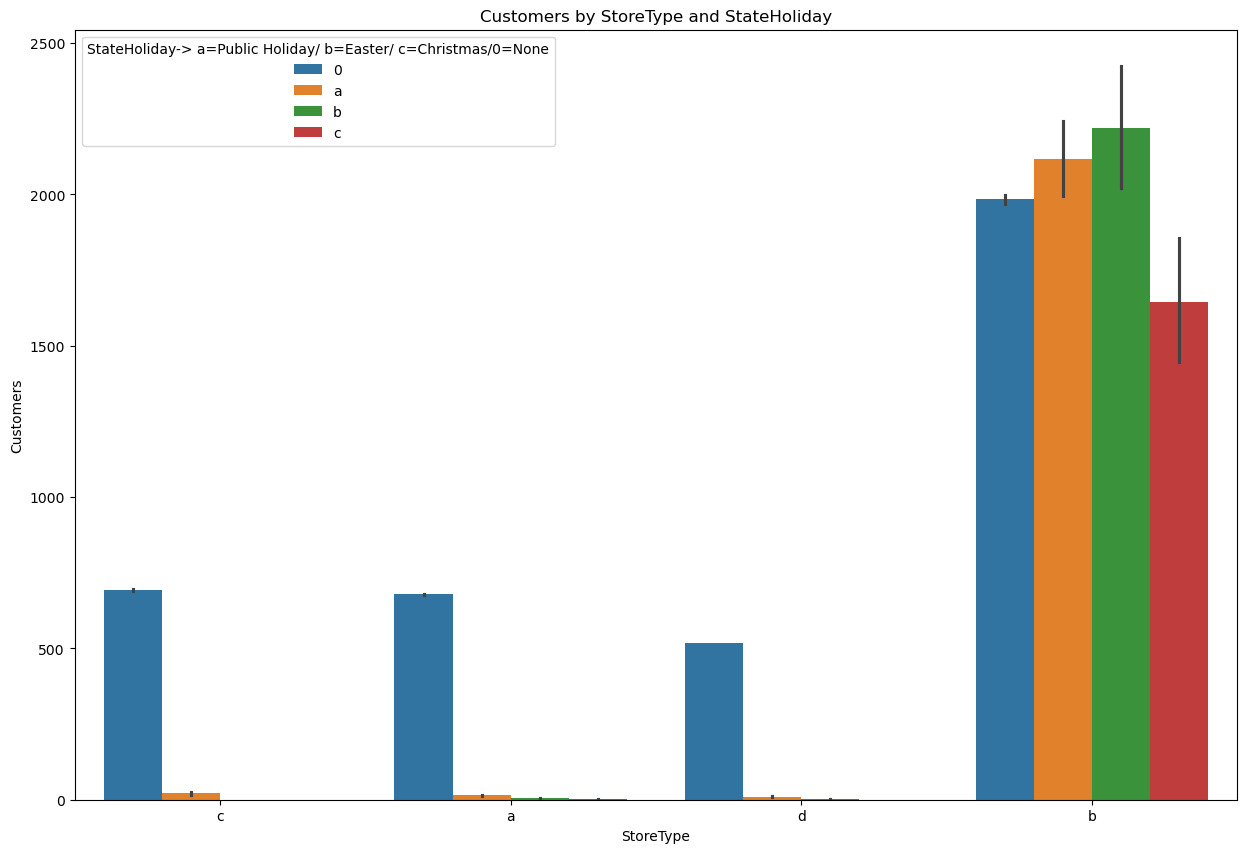

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Customers',hue='StateHoliday',data=data)
plt.title('Customers by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title="StateHoliday-> a=Public Holiday/ b=Easter/ c=Christmas/0=None")

## Feature Engineering 

In [ ]:
#Feature Engineering
#PromotionFlags & Holiday Indicators

In [99]:
data['PromotionFlags']=((data['Promo']==1)|(data['Promo2']==1)).astype(int)
data["PromotionFlags"].value_counts() #check

PromotionFlags
1    703242
0    313967
Name: count, dtype: int64

In [100]:
# StateHoliday as a binary variable
data['StateHolidayIndicators']=data['StateHoliday'].apply(lambda x: 1 if str(x).strip() in ['a','b','c'] else 0).astype(int)
data['HolidayIndicators']=((data['StateHolidayIndicators']==1)|(data['SchoolHoliday']==1)).astype(int)
data["StateHolidayIndicators"].value_counts() #Check

StateHolidayIndicators
0    986159
1     31050
Name: count, dtype: int64

/tmp/ipykernel_1245/2798851945.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="0=No promo / 1= Promo")


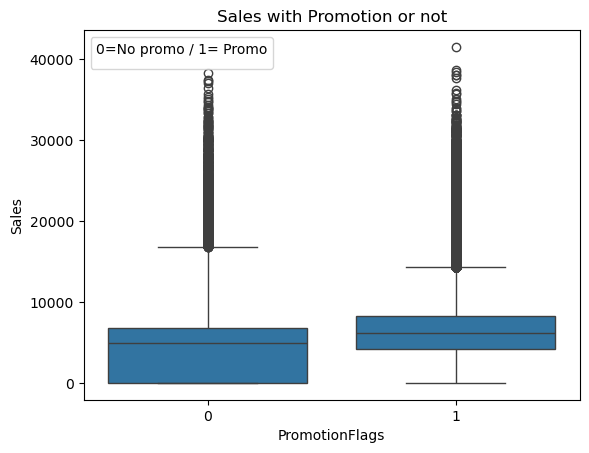

In [ ]:
sns.boxplot(x=data["PromotionFlags"],y="Sales",data=data)
plt.title('Sales with Promotion or not')
plt.legend(title="0=No promo / 1= Promo")

/tmp/ipykernel_11516/873906043.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="0=No Holidays/ 1= Holidays")


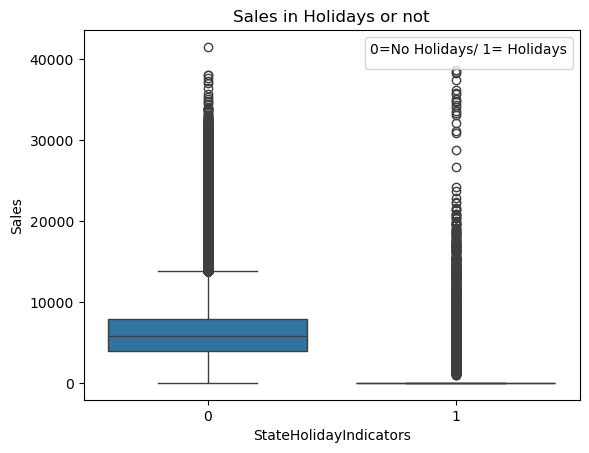

In [ ]:
sns.boxplot(y="Sales",x="StateHolidayIndicators",data=data)
plt.title('Sales in Holidays or not')
plt.legend(title="0=No Holidays/ 1= Holidays")

## Time Series & Machine Learning Models

In [101]:
#Time Series 
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from prophet import Prophet
from pmdarima import auto_arima ,ARIMA, model_selection
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [ ]:
data[(data.Open == 0) & (data.Sales == 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromotionFlags,StateHolidayIndicators,HolidayIndicators
291,292,5,2015-07-31,0,0,0,1,0,1,a,...,1100.0,6.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1,a,...,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1,a,...,1100.0,6.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1,a,...,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov",1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1,a,...,1100.0,6.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,1


In [ ]:
#Open stores with no sales for some reasons
#data[(data.Open == 1) & (data.Sales== 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromotionFlags,StateHolidayIndicators,HolidayIndicators


In [ ]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day',
       'PromotionFlags', 'StateHolidayIndicators', 'HolidayIndicators'],
      dtype='object')

In [102]:
#split the dataset in test & train
split_date = '2015-07-01'
train_data=data[data['Date']<split_date].copy()
test_data =data[data['Date']>=split_date].copy()

In [ ]:
#check
print(train_data["Date"])
print(test_data["Date"])
train_data['Sales']=train_data['Sales'].astype(float)

34565      2015-06-30
34566      2015-06-30
34567      2015-06-30
34568      2015-06-30
34569      2015-06-30
              ...    
1017204    2013-01-01
1017205    2013-01-01
1017206    2013-01-01
1017207    2013-01-01
1017208    2013-01-01
Name: Date, Length: 982644, dtype: object
0        2015-07-31
1        2015-07-31
2        2015-07-31
3        2015-07-31
4        2015-07-31
            ...    
34560    2015-07-01
34561    2015-07-01
34562    2015-07-01
34563    2015-07-01
34564    2015-07-01
Name: Date, Length: 34565, dtype: object


In [ ]:
#data=data.reset_index() 
#data['Date']=pd.to_datetime(data['Date'])
#data.set_index('Date',inplace=True,drop=False)  

In [103]:
data["Sales"]=data["Sales"].astype(float)
data=data.rename(columns={"Sales":"y"})

In [104]:
train_data["Sales"]=train_data["Sales"].astype(float)
train_data=train_data.rename(columns={"Sales":"y"})

test_data["Sales"]=test_data["Sales"].astype(float)
test_data=test_data.rename(columns={"Sales":"y"})

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=28775.966, Time=0.03 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=28660.898, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=28626.610, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=30181.247, Time=0.01 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=28777.952, Time=0.04 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=28613.467, Time=0.41 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=28700.028, Time=0.26 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=28409.277, Time=0.95 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=28651.593, Time=0.62 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=28399.467, Time=1.38 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=28442.102, Time=0.95 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=28406.154, Time=1.68 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.20 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,2)[7] intercept   : AIC=28398.019, Time=5.44 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,2)[7] intercept   : AIC=28439.384, Time=2.80 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,1)[7] intercept   : AIC=28404.865, Time=1.44 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=28612.851, Time=0.91 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=5.19 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,0,2)[7] intercept   : AIC=28385.849, Time=3.69 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,2)[7] intercept   : AIC=28434.806, Time=2.56 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,0,1)[7] intercept   : AIC=28392.266, Time=1.52 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,1)[7] intercept   : AIC=28591.779, Time=0.94 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(2,0,2)[7] intercept   : AIC=inf, Time=5.50 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,2)[7] intercept   : AIC=28362.317, Time=5.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(1,0,2)[7] intercept   : AIC=28412.772, Time=2.96 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,1)[7] intercept   : AIC=28368.900, Time=1.38 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(1,0,1)[7] intercept   : AIC=28580.589, Time=1.05 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(2,0,2)[7] intercept   : AIC=28435.082, Time=2.94 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,5)(2,0,2)[7] intercept   : AIC=28503.925, Time=7.08 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,5)(2,0,2)[7] intercept   : AIC=inf, Time=7.94 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,2)[7]             : AIC=29334.037, Time=2.47 sec

Best model:  ARIMA(0,0,4)(2,0,2)[7] intercept
Total fit time: 72.343 seconds


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  911
Model:             SARIMAX(0, 0, 4)x(2, 0, [1, 2], 7)   Log Likelihood              -14171.158
Date:                                Tue, 06 May 2025   AIC                          28362.317
Time:                                        09:55:40   BIC                          28410.462
Sample:                                    01-01-2013   HQIC                         28380.698
                                         - 06-30-2015                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.327e+06   4.23e+05      7.862      0.000     2.5e+06    4.16e+06
ma.

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


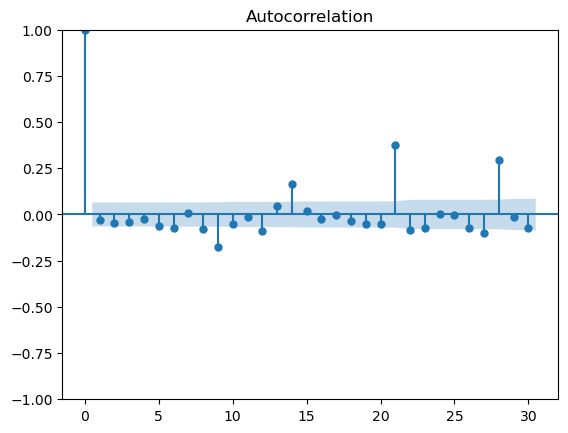

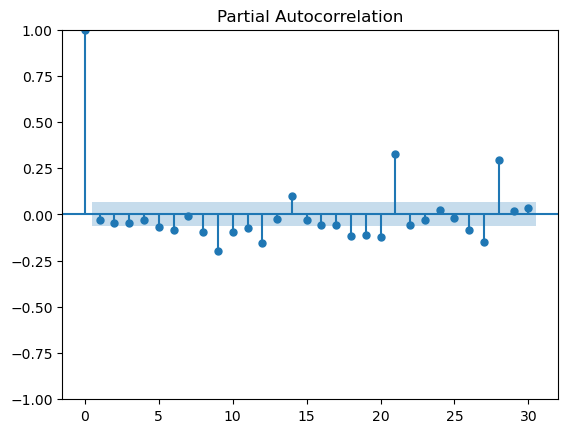

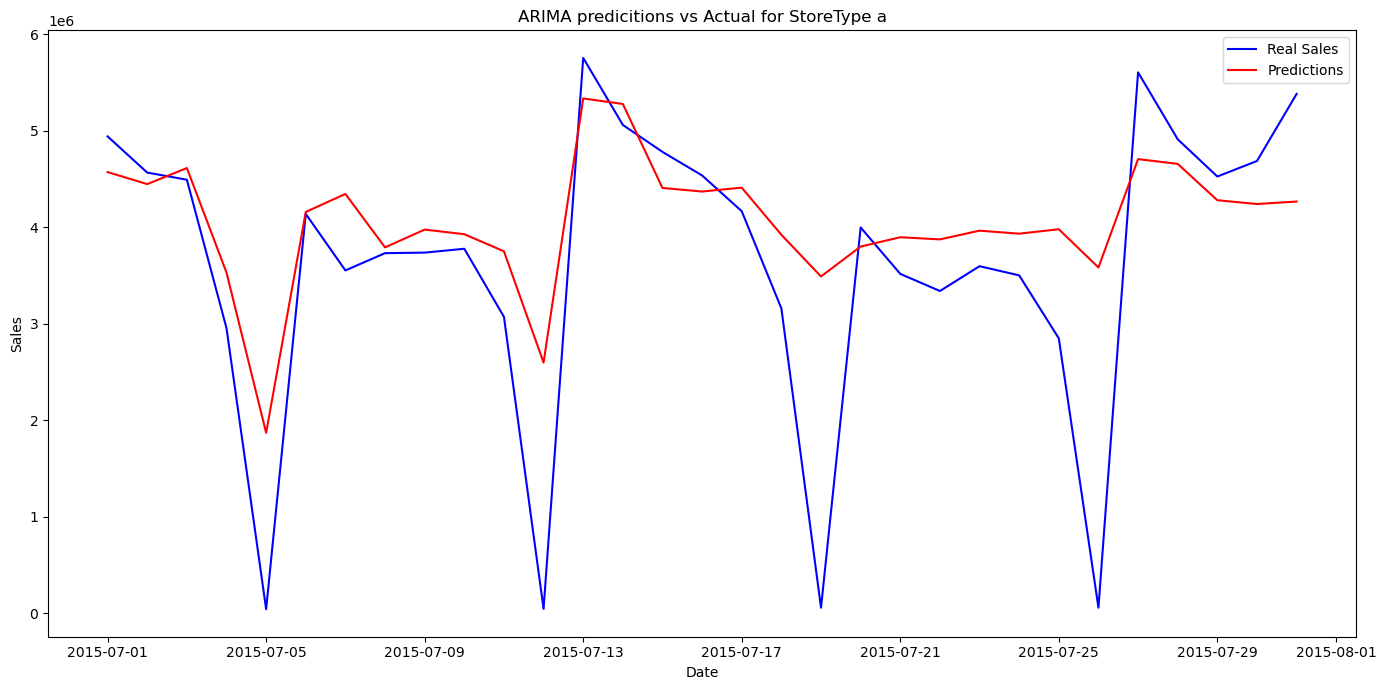

In [ ]:
#ARIMA model for Store Types
#StoreType -> A
store_type='a'

#split data in test & train for storetype A
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_a=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_a.fit(train)
print(model_a.summary())

#Predicitions for next month
forecast_a=model_a.predict(n_periods=31)
print(forecast_a)

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_a
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_a.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(14,7))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=20570.688, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=21485.795, Time=0.02 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=20904.496, Time=0.27 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=21064.154, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=21483.816, Time=0.02 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=21088.377, Time=0.55 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=20790.029, Time=0.48 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=20545.982, Time=5.50 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=20615.175, Time=2.19 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=20549.852, Time=5.50 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=20555.739, Time=5.22 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=20570.137, Time=1.99 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=20593.171, Time=1.94 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[7] intercept   : AIC=20542.675, Time=5.90 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[7] intercept   : AIC=20557.621, Time=1.23 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=5.47 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,2)[7] intercept   : AIC=20534.763, Time=6.30 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[7] intercept   : AIC=20551.646, Time=5.92 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,2)[7] intercept   : AIC=20583.112, Time=3.01 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,2)[7] intercept   : AIC=20334.754, Time=7.36 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(1,0,2)[7] intercept   : AIC=20360.998, Time=6.12 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,1)[7] intercept   : AIC=20360.142, Time=6.96 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(1,0,1)[7] intercept   : AIC=20383.958, Time=1.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=6.42 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(2,0,2)[7] intercept   : AIC=20342.388, Time=7.62 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,2)[7] intercept   : AIC=20473.706, Time=7.41 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[7] intercept   : AIC=inf, Time=6.86 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(2,0,2)[7] intercept   : AIC=20531.533, Time=6.60 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(2,0,2)[7] intercept   : AIC=20439.859, Time=7.72 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(2,0,2)[7]             : AIC=inf, Time=5.07 sec

Best model:  ARIMA(4,1,2)(2,0,2)[7] intercept
Total fit time: 122.545 seconds


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  911
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -10155.377
Date:                           Mon, 05 May 2025   AIC                          20334.754
Time:                                   17:05:47   BIC                          20392.516
Sample:                               01-01-2013   HQIC                         20356.808
                                    - 06-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    246.3068    279.206      0.882      0.378    -300.926     793.540
ar.L1         -1.4752      0.078    -18.800

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


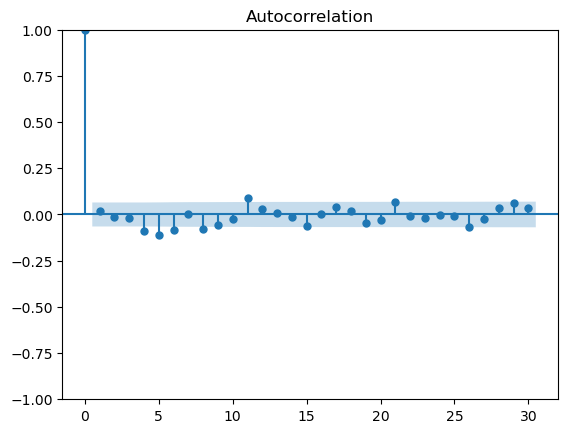

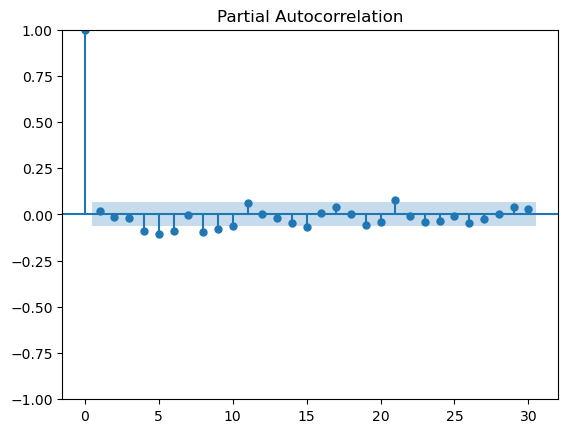

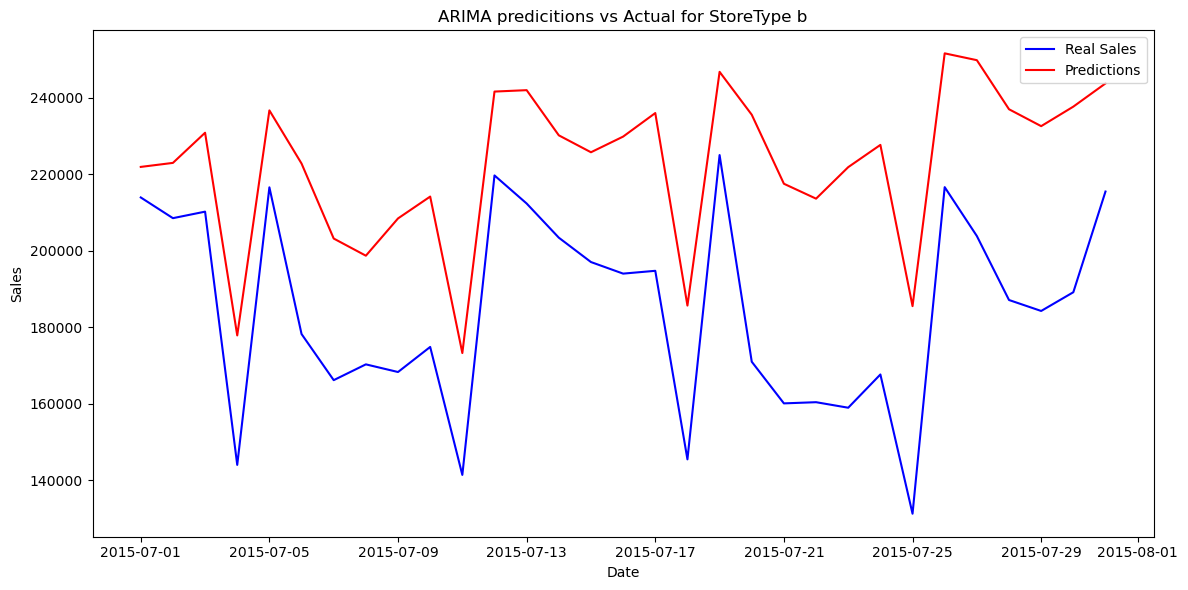

In [ ]:
#ARIMA model for Store Types
#StoreType -> B
store_type='b'

#split data in test & train for storetype B
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_b=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_b.fit(train)
print(model_b.summary())

#Predicitions for next month
forecast_b=model_b.predict(n_periods=31)
print(forecast_b)

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_b
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_b.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=26208.151, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=26119.683, Time=0.18 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=26074.236, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=27631.639, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=26201.644, Time=0.04 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=26068.291, Time=0.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=26161.086, Time=0.25 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=25856.710, Time=0.97 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=26112.300, Time=0.66 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=25844.267, Time=1.20 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=25887.713, Time=0.89 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=25845.861, Time=1.13 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.14 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,2)[7] intercept   : AIC=25836.753, Time=4.28 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,2)[7] intercept   : AIC=25882.549, Time=2.76 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,1)[7] intercept   : AIC=25848.835, Time=1.18 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=26061.743, Time=0.92 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=4.90 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,0,2)[7] intercept   : AIC=25817.194, Time=4.01 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,2)[7] intercept   : AIC=25866.066, Time=2.64 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,0,1)[7] intercept   : AIC=25824.109, Time=1.18 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,1)[7] intercept   : AIC=26020.088, Time=0.95 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(2,0,2)[7] intercept   : AIC=inf, Time=5.63 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,2)[7] intercept   : AIC=25794.244, Time=4.84 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(1,0,2)[7] intercept   : AIC=25845.117, Time=2.82 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,1)[7] intercept   : AIC=25801.318, Time=1.18 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(1,0,1)[7] intercept   : AIC=26009.368, Time=1.15 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(2,0,2)[7] intercept   : AIC=inf, Time=6.31 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,5)(2,0,2)[7] intercept   : AIC=inf, Time=7.10 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,5)(2,0,2)[7] intercept   : AIC=inf, Time=7.42 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(2,0,2)[7]             : AIC=26784.450, Time=2.17 sec

Best model:  ARIMA(0,0,4)(2,0,2)[7] intercept
Total fit time: 71.767 seconds


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  911
Model:             SARIMAX(0, 0, 4)x(2, 0, [1, 2], 7)   Log Likelihood              -12887.122
Date:                                Mon, 05 May 2025   AIC                          25794.244
Time:                                        13:04:39   BIC                          25842.390
Sample:                                    01-01-2013   HQIC                         25812.625
                                         - 06-30-2015                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.226e+05   1.04e+05      7.883      0.000    6.18e+05    1.03e+06
ma.

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


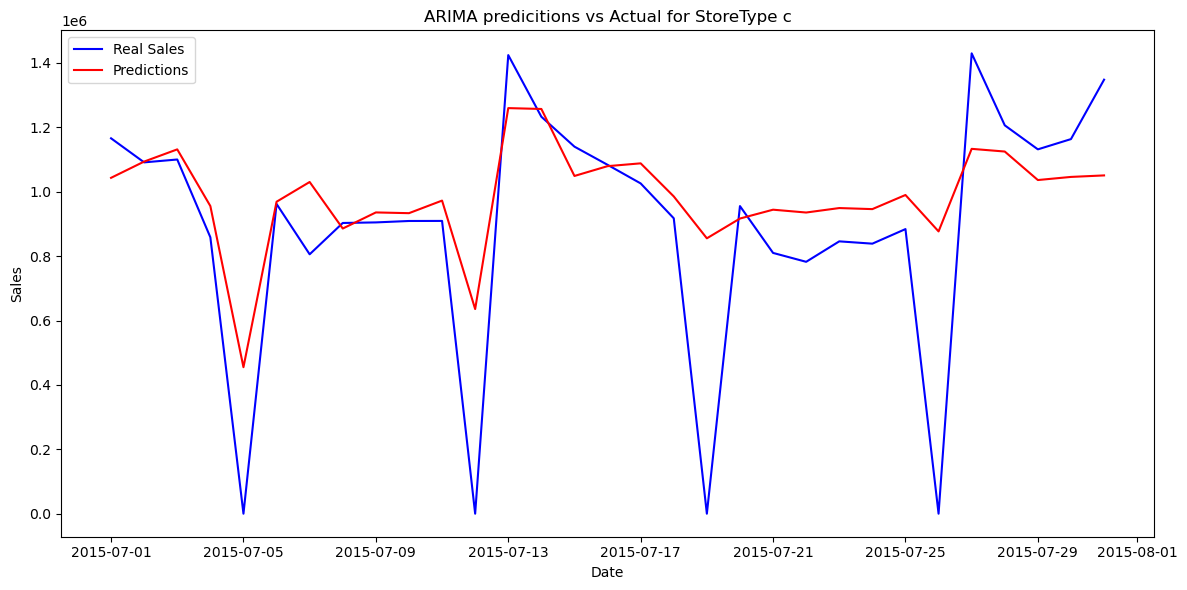

In [ ]:
#ARIMA model for Store Types
#StoreType -> C
store_type='c'

#split data in test & train for storetype C
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_c=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_c.fit(train)
print(model_c.summary())

#Predicitions for next month
forecast_c=model_c.predict(n_periods=31)
print(forecast_c)

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_c
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_c.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=27727.056, Time=0.02 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=27643.169, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=27605.676, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=29117.546, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=27724.079, Time=0.05 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=27600.260, Time=0.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=27682.177, Time=0.22 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=27386.675, Time=0.75 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=27625.934, Time=0.53 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=27377.445, Time=1.06 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=27419.179, Time=0.79 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=27377.337, Time=1.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=27418.026, Time=0.69 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=27386.365, Time=0.78 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.60 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=27382.649, Time=1.29 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.98 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,2)[7]             : AIC=26791.572, Time=0.54 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[7]             : AIC=26909.621, Time=0.59 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,1)[7]             : AIC=26826.220, Time=0.38 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[7]             : AIC=inf, Time=0.30 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[7]             : AIC=27590.969, Time=1.12 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,2)[7]             : AIC=28288.025, Time=0.81 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[7]             : AIC=27304.867, Time=0.64 sec

Best model:  ARIMA(0,0,0)(2,0,2)[7]          
Total fit time: 16.589 seconds


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                  SARIMAX Results                                   
Dep. Variable:                            y   No. Observations:                  911
Model:             SARIMAX(2, 0, [1, 2], 7)   Log Likelihood              -13390.786
Date:                      Mon, 05 May 2025   AIC                          26791.572
Time:                              17:06:53   BIC                          26815.644
Sample:                          01-01-2013   HQIC                         26800.762
                               - 06-30-2015                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.2594      0.051      5.048      0.000       0.159       0.360
ar.S.L14       0.7397      0.051     14.395      0.000       0.639       0.840
ma.S

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


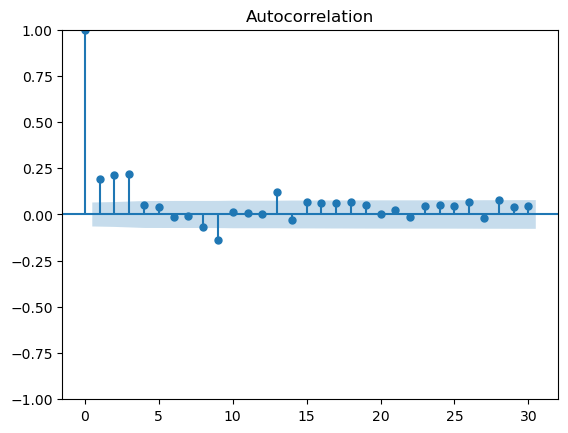

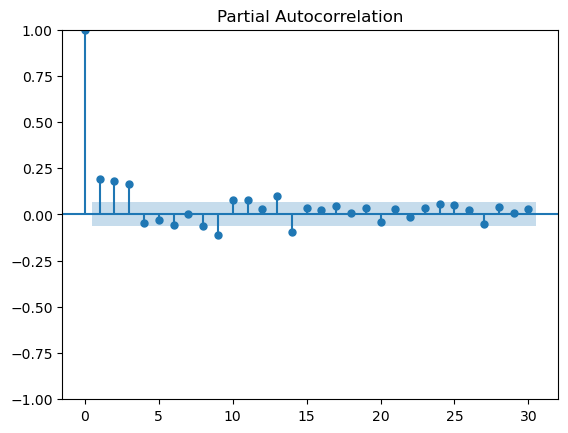

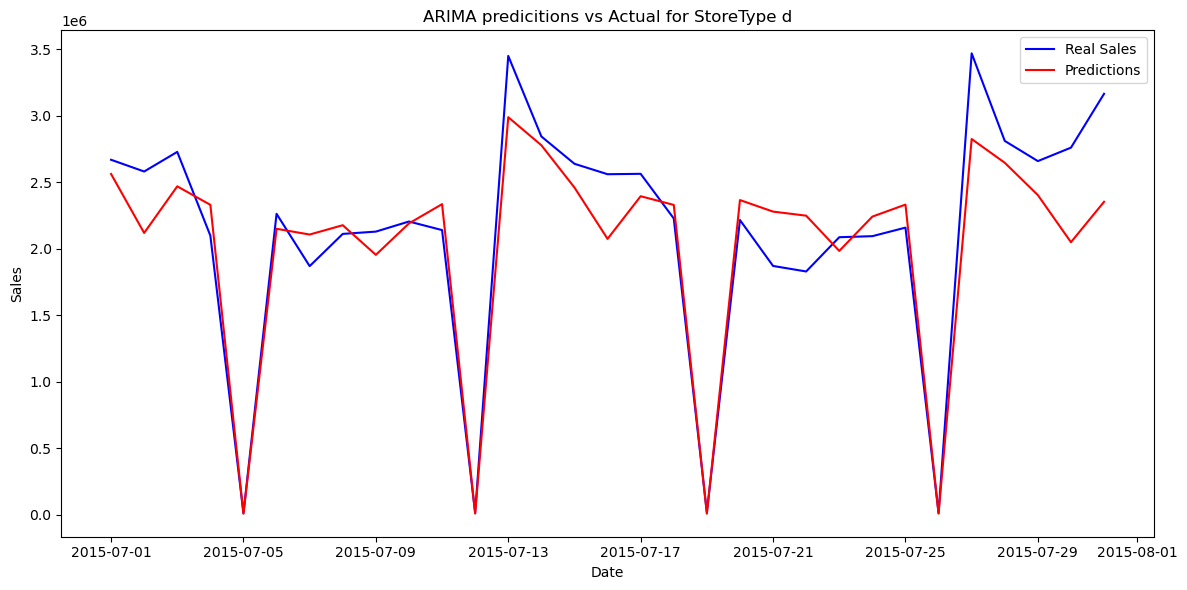

In [ ]:
#ARIMA model for Store Types
#StoreType -> D
store_type='d'

#split data in test & train for storetype D
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_d=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_d.fit(train)
print(model_d.summary())

#Predicitions for next month
forecast_d=model_d.predict(n_periods=31)
print(forecast_d)

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_d
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_d.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

598
Performing stepwise search to minimize aic


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=14050.388, Time=0.01 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=13270.718, Time=0.42 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=14048.395, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=13772.443, Time=0.03 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=13106.306, Time=0.80 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=13024.216, Time=1.61 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=13002.113, Time=0.76 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=13568.516, Time=0.13 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=13042.807, Time=1.26 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=13386.649, Time=0.61 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.47 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=13236.876, Time=0.68 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=12903.827, Time=0.86 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=13446.555, Time=0.14 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=13191.931, Time=0.40 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=12879.595, Time=3.89 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=12978.626, Time=2.28 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.82 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=12904.362, Time=1.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,1)[7] intercept   : AIC=12866.741, Time=3.52 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[7] intercept   : AIC=12899.609, Time=1.04 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=12975.289, Time=3.18 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,2)[7] intercept   : AIC=12861.201, Time=4.17 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[7] intercept   : AIC=12881.686, Time=1.87 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,2)[7] intercept   : AIC=12862.163, Time=5.14 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=4.74 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=4.56 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=6.43 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,2)[7]             : AIC=12857.539, Time=4.01 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[7]             : AIC=12863.227, Time=1.68 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,1)[7]             : AIC=12859.229, Time=3.08 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[7]             : AIC=12883.951, Time=0.75 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[7]             : AIC=12866.131, Time=3.44 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,2)[7]             : AIC=12860.093, Time=4.78 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,2)[7]             : AIC=inf, Time=5.71 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,2)[7]             : AIC=inf, Time=7.00 sec


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,1)(2,0,2)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
    

 ARIMA(4,1,1)(2,0,2)[7]             : AIC=inf, Time=nan sec

Best model:  ARIMA(3,1,0)(2,0,2)[7]          
Total fit time: 92.639 seconds
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  727
Model:             SARIMAX(3, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -6420.770
Date:                                Mon, 05 May 2025   AIC                          12857.539
Time:                                        16:56:40   BIC                          12894.240
Sample:                                             0   HQIC                         12871.702
                                                - 727                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

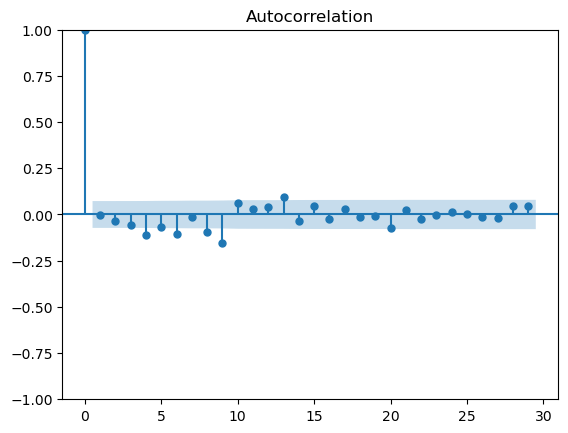

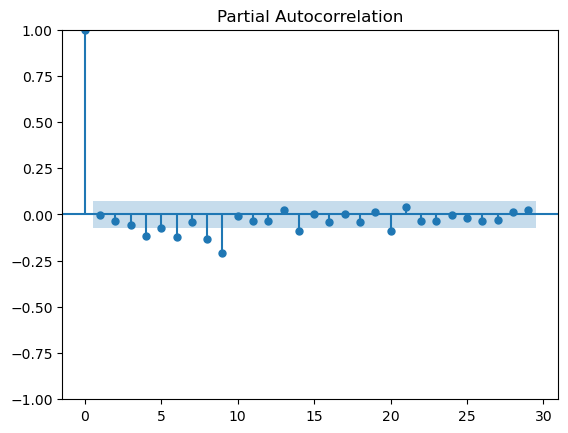

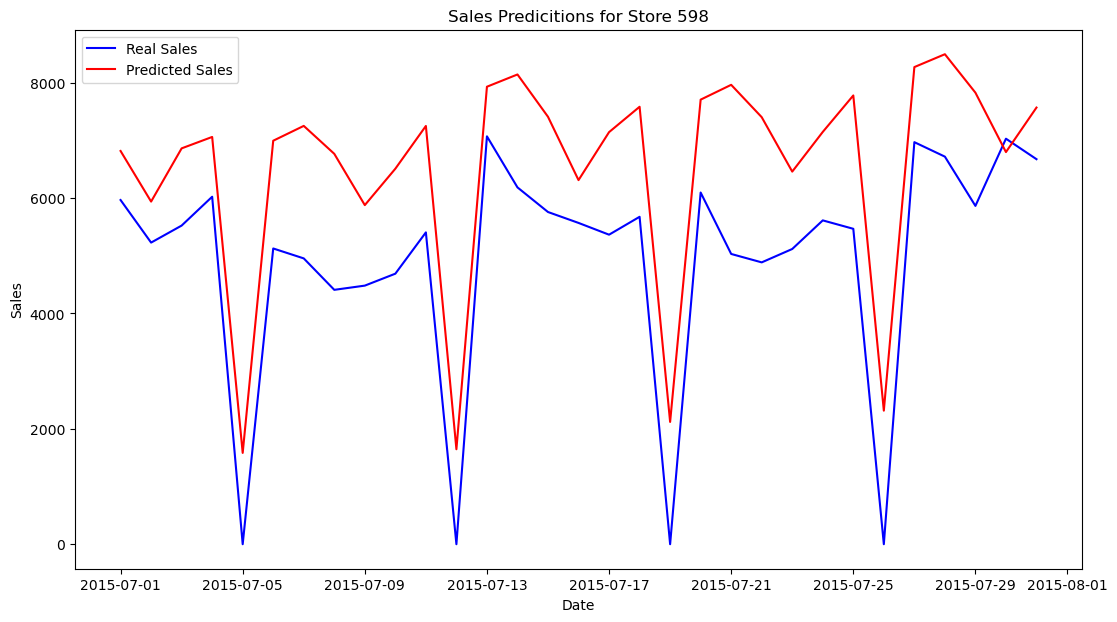

In [ ]:
#Arima model for one store at a time
Store_ID=np.random.choice(range(1,data["Store"].max()))   #OR Store_ID=... for a specific store 
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

##Arima with seasonality and data for every day
model=auto_arima(train_store["y"],seasonal=True, m=7,trace=True,suppress_warnings=True)
print(model.summary())

#Predictions
prediction_arima=model.predict(n_periods=31)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
mse=mean_squared_error(test_store["y"],prediction_arima)
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.title(f"Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

1081


/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  911
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -7695.306
Date:                           Mon, 05 May 2025   AIC                          15400.612
Time:                                   16:58:18   BIC                          15424.679
Sample:                               01-01-2013   HQIC                         15409.801
                                    - 06-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4621      4.393      0.105      0.916      -8.148       9.072
ma.L1         -0.2812      0.020    -14.153

/home/georgest/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


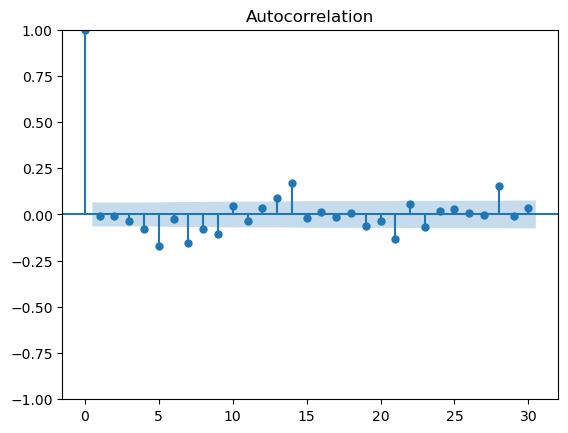

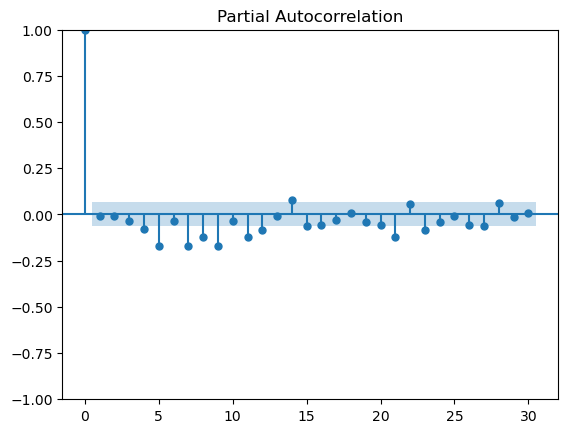

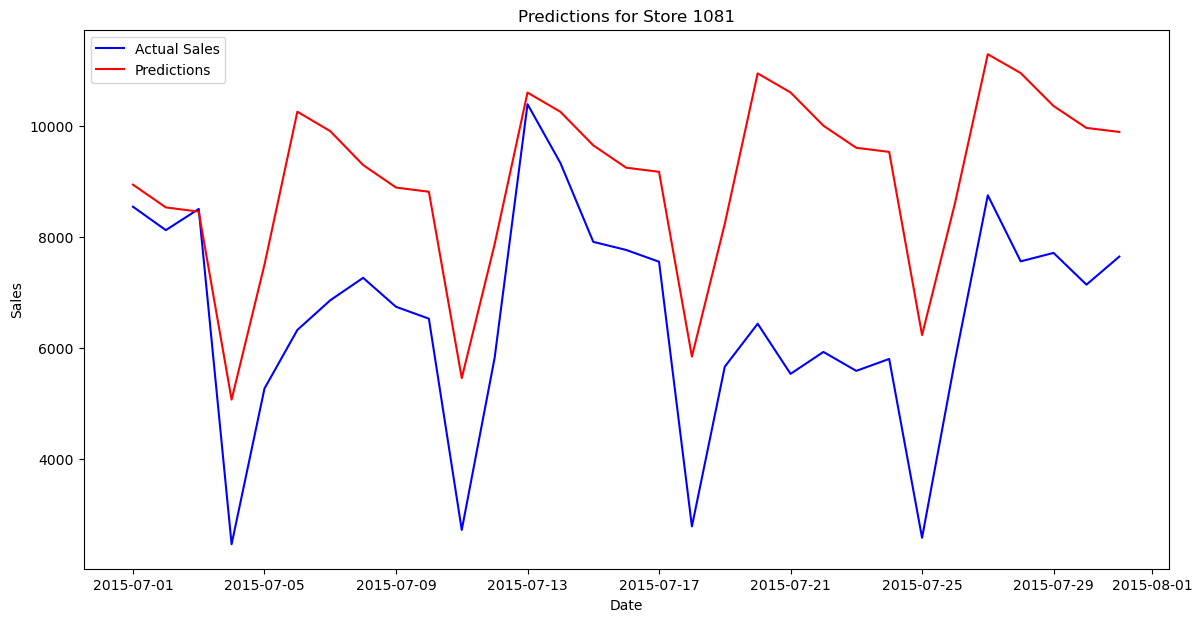

In [ ]:
#Arima for Stores with different characteristics (PromotionFlags,HolidayIndicators & StoreTypes)

PROMO_FLAG=1   #0->No & 1->Yes
HOLIDAY=0      #0->No & 1->Yes
STORE_TYPE='b'  #a,b,c or d

#Data with the above information
selected_stores=data.copy()
if PROMO_FLAG is not None:
    selected_stores=selected_stores[selected_stores["PromotionFlags"]==PROMO_FLAG]

if HOLIDAY is not None:
    selected_stores=selected_stores[selected_stores["HolidayIndicators"]==HOLIDAY]

if STORE_TYPE is not None:
    selected_stores=selected_stores[selected_stores["StoreType"]==STORE_TYPE]

#Random Store
stores=selected_stores["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#test & train data
store_data=data[data["Store"]==Store_ID].copy()
store_data["Date"]=pd.to_datetime(store_data["Date"])
store_data=store_data.sort_values("Date")
store_data.set_index("Date",inplace=True)
split_date='2015-07-01'
train_store=store_data[store_data.index<split_date]
test_store=store_data[store_data.index>=split_date]

#ARIMA model
model_new=auto_arima(train_store["y"],seasonal=True,m=7,trace=False,suppress_warnings=True)
print(model_new.summary())

#Predictions
pred=model_new.predict(n_periods=31)
#pred[pred<0]=0
print(pred)

#Statistics for model fit
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
mse=mean_squared_error(test_store["y"],pred)
mae=mean_absolute_error(test_store["y"],pred)
mape=mean_absolute_percentage_error(test_store["y"],pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2%}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_new.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#plot for real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_store.index,test_store["y"],label="Actual Sales",color='blue')
plt.plot(test_store.index,pred,label="Predictions",color='red')
plt.title(f"Predictions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [105]:
state_dates=train_data[(train_data.StateHoliday=='a')|(train_data.StateHoliday=='b')|(train_data.StateHoliday=='c')].loc[:,'Date'].values
school_dates=train_data[train_data.SchoolHoliday==1].loc[:,'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays=pd.concat((state,school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


330


16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:57 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_1703/2045908580.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future['PromotionFlags'].fillna(1, inplace=True)  #With promotion because most stores have promo


            ds         yhat   yhat_lower   yhat_upper
951 2015-08-10  4497.089993  3274.989639  5674.356536
952 2015-08-11  4010.244335  2846.271104  5314.623404
953 2015-08-12  3939.766979  2728.750488  5145.295817
954 2015-08-13  3922.781905  2742.910772  5149.250616
955 2015-08-14  4192.813241  2946.978788  5410.554877
R_squared: 0.66
RMSE: 878.14
MAPE: 171664263040462624.00


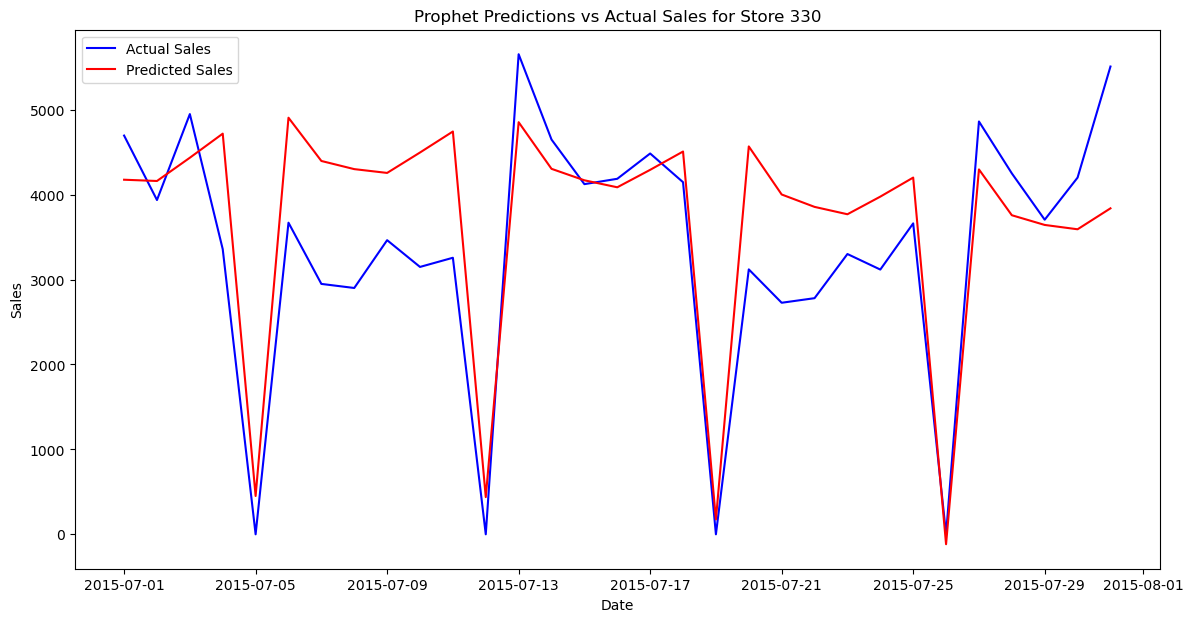

In [ ]:
#Prophet model

#Random Store
Store_ID=np.random.choice(range(1,train_data["Store"].max())) #OR Store_ID=... for a specific store
print(Store_ID)

store_data = data[data["Store"] == Store_ID].copy()
store_data['ds'] = pd.to_datetime(store_data['Date'])
store_data['y'] = store_data['y']

# Split store data into train and test based on 'ds'
train_df=store_data[store_data['ds']<split_date].copy()
test_df=store_data[store_data['ds']>= split_date].copy()

##Columns that we will use in the regressors
sel=['ds','y','PromotionFlags']
train_df=train_df[sel]
test_df=test_df[sel]

#Model
m=Prophet(holidays=holidays)
m.add_regressor("PromotionFlags")
#m.add_regressor("CompetitionDistance") #IT RETURNS NEGATIVE PREDICITIONS BECAUSE OF THE OUTLIERS
#m.add_regressor("Customers") #IT RETURNS NEGATIVE PREDICTIONS BECAUSE OF THE OUTLIERS
m.fit(train_df)

#Future dataframe for next 45 days
future=m.make_future_dataframe(periods=45, freq='D')

#Merge with current data
future=future.merge(store_data[['ds','PromotionFlags']],on='ds',how='left')
future['PromotionFlags'].fillna(1, inplace=True)  #With promotion because most stores have promo

#Predictions
forecast=m.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

#Model fit with some statistics
merged=pd.merge(test_df[['ds','y']],forecast[['ds','yhat']],on='ds',how='inner')
r2=r2_score(merged['y'],merged['yhat'])
rmse=np.sqrt(mean_squared_error(merged['y'],merged['yhat']))
mape=mean_absolute_percentage_error(merged['y'],merged['yhat'])
print(f"R_squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

#Plot real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(merged['ds'],merged['y'],label='Actual Sales',color='blue')
plt.plot(merged['ds'],merged['yhat'],label='Predicted Sales',color='red')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

769


11:39:05 - cmdstanpy - INFO - Chain [1] start processing
11:39:06 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_1693/852290653.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future["PromotionFlags"].fillna(1,inplace=True)  # with promo


R2:0.07
RMSE:1517.33
MAPE:9.98%
MAE:1209.72


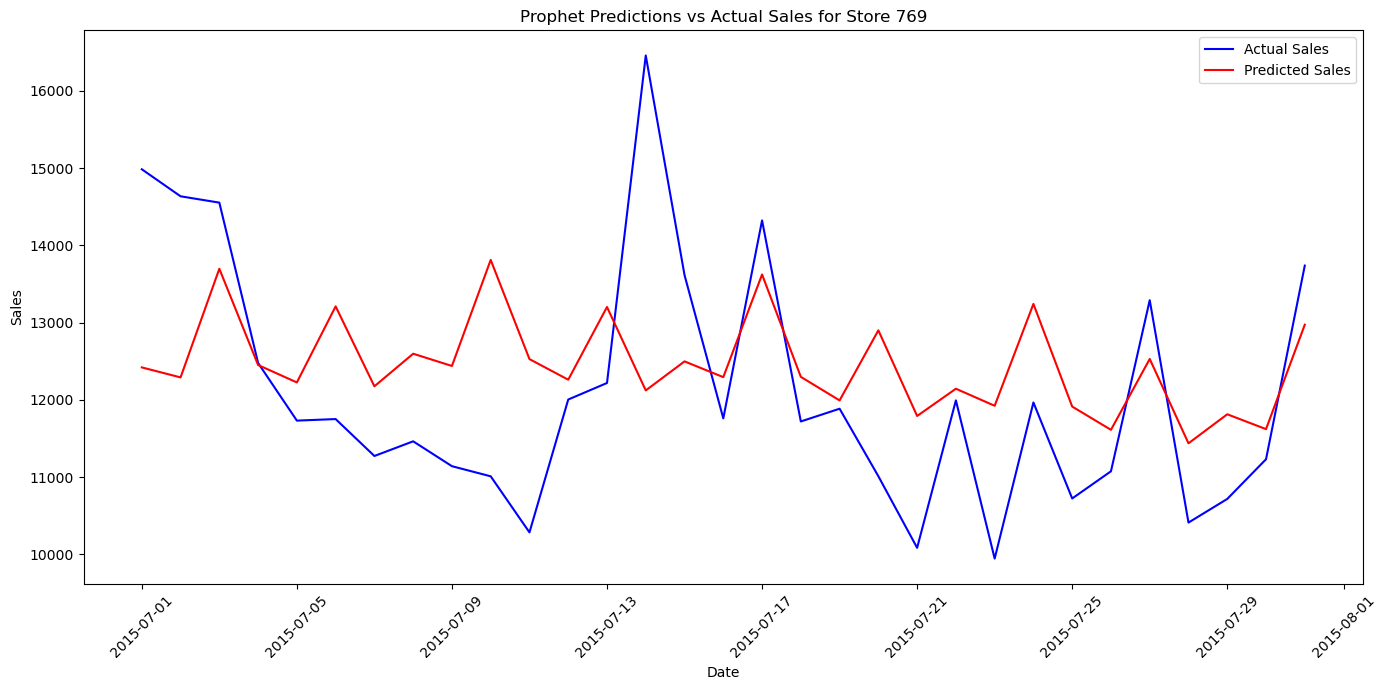

In [ ]:
#Prophet model for stores with different charachteristics
PROMO_FLAG=1
HOLIDAY=0
STORE_TYPE='b'

#Data with the above information
filtered_data=data.copy()
if PROMO_FLAG is not None:
    filtered_data=filtered_data[filtered_data["PromotionFlags"]==PROMO_FLAG]
if HOLIDAY is not None:
    filtered_data=filtered_data[filtered_data["HolidayIndicators"]==HOLIDAY]
if STORE_TYPE is not None:
    filtered_data=filtered_data[filtered_data["StoreType"]==STORE_TYPE]

#Random Selection
stores=filtered_data["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#TEST & TRAIN DATA
store_data=data[data["Store"]==Store_ID].copy()
store_data["ds"]=pd.to_datetime(store_data["Date"])
store_data=store_data[["ds","y","PromotionFlags"]].copy()
train_df=store_data[store_data["ds"]<split_date].copy()
test_df=store_data[store_data["ds"]>=split_date].copy()

#Model
m_new=Prophet(holidays=holidays)
m_new.add_regressor("PromotionFlags")
m_new.fit(train_df)

#Future dataframe
future=m_new.make_future_dataframe(periods=45, freq='D')
future=future.merge(store_data[["ds","PromotionFlags"]],on="ds",how="left")
future["PromotionFlags"].fillna(1,inplace=True)  # with promo

#Predicitions
forecast=m_new.predict(future)

#Model fit
merged=pd.merge(test_df[["ds", "y"]], forecast[["ds","yhat"]],on="ds",how="inner")
rmse=np.sqrt(mean_squared_error(merged["y"],merged["yhat"]))
mape=mean_absolute_percentage_error(merged["y"],merged["yhat"])
mae= mean_absolute_error(merged["y"],merged["yhat"])
r2=r2_score(merged["y"], merged["yhat"])
print(f"R2:{r2:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAPE:{mape:.2%}")
print(f"MAE:{mae:.2f}")

#Plot
plt.figure(figsize=(14,7))
plt.plot(merged["ds"],merged["y"],label="Actual Sales",color="blue")
plt.plot(merged["ds"],merged["yhat"],label="Predicted Sales",color="red")
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [122]:
#Machine Learning models
#LightGBM & XGBoost
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import StandardScaler

In [107]:
#Preparation for models
target='y'
cols=['y','Date'] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]

cat_cols=['StateHoliday','StoreType','Assortment','PromoInterval']
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [108]:
#convert train data as a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
#test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [109]:
#Model Parameters
par={
    'objective':'regression',
    'metric':'rmse',
    'boosting_type':'gbdt',
    'num_leaves':31,
    'learning_rate':0.05,
    'verbose':-1,
}

In [110]:
#model
model_lgbm=LGBMRegressor(**par)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 870.947
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 870.947


LGBMRegressor(learning_rate=0.05, metric='rmse', objective='regression',
              verbose=-1)

                      Feature  Importance
2                   Customers         647
9         CompetitionDistance         386
11   CompetitionOpenSinceYear         363
7                   StoreType         305
13            Promo2SinceWeek         294
10  CompetitionOpenSinceMonth         263
0                       Store         175
4                       Promo         160
8                  Assortment         136
1                   DayOfWeek         127


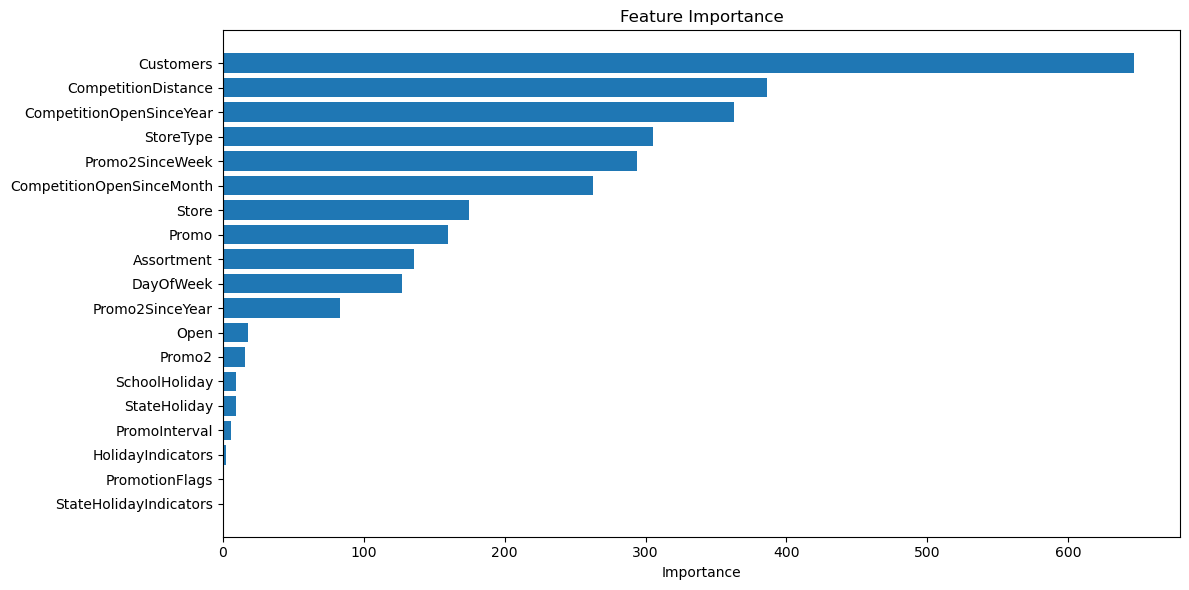

In [111]:
#Feature Importance Plot in order to choose the best variables for the model
var_selection=pd.DataFrame({'Feature':X_train.columns,'Importance':model_lgbm.feature_importances_}).sort_values(by='Importance',ascending=False)
print(var_selection.head(10)) #results

#Plot with the importance of each variable
plt.figure(figsize=(12,6))
plt.barh(var_selection['Feature'][::-1],var_selection['Importance'][::-1])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [112]:
#important variables
important_features=['Customers','Store','CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','StoreType','Assortment',
'Promo']

In [113]:
#New model preparation
X_train_new=X_train[important_features]
X_test_new=X_test[important_features]

In [114]:
#New model
model_lgbm_new=LGBMRegressor(**par)
model_lgbm_new.fit(X_train_new,y_train,eval_set=[(X_test_new,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 873.774
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 873.774


LGBMRegressor(learning_rate=0.05, metric='rmse', objective='regression',
              verbose=-1)

In [115]:
#Predictions
y_pred=model_lgbm_new.predict(X_test_new)

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.2f}")
print(f"MAE:{mae:.2f}")
print(f"R²:{r2:.4f}")

RMSE:873.77
MAE:611.51
R²:0.9413


In [116]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSales']=y_pred

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSales'])),
        'MAE':mean_absolute_error(df['y'],df['PredictedSales']),
        'R²':r2_score(df['y'],df['PredictedSales'])
    })
).reset_index()
print(store_results)

      Store         RMSE          MAE        R²
0         1   257.651804   200.307170  0.975139
1         2  1130.313779   536.132612  0.679321
2         3   675.196629   537.233490  0.939041
3         4   535.179280   364.032546  0.979448
4         5   421.170920   356.221174  0.958226
...     ...          ...          ...       ...
1110   1111   822.699481   562.317603  0.839709
1111   1112  1467.128983  1279.371720  0.828669
1112   1113   484.399021   373.350105  0.963013
1113   1114  1933.358228  1489.206251  0.944041
1114   1115   995.601089   867.105914  0.863730

[1115 rows x 4 columns]


/tmp/ipykernel_25849/2141513368.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_results = test_data.groupby('Store').apply(


/tmp/ipykernel_25849/1436620733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_df['Date']=pd.to_datetime(store_df['Date'])


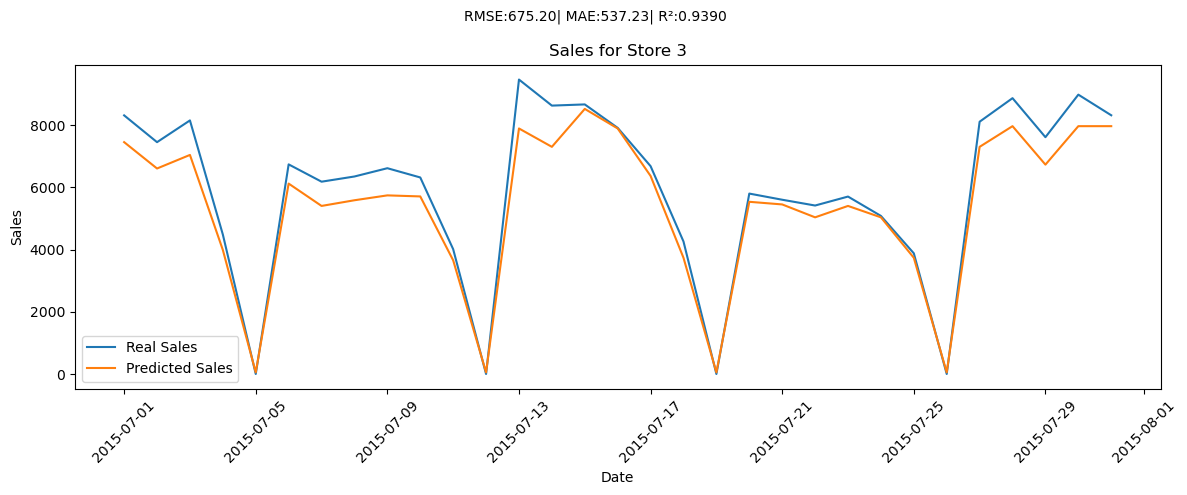

In [117]:
#Predictions for a specific store
store_ID=3
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSales']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSales'])
r2_store=r2_score(store_df['y'],store_df['PredictedSales'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSales'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
#Split Store IDs in 3 parts becasuse python can't run
store_ids=test_data['Store'].unique()
n=len(store_ids)
one_third=n//3
two_third=2*(n//3)
first_part=store_ids[:one_third]
second_part=store_ids[one_third:two_third]
third_part=store_ids[two_third:]

In [ ]:
#Plots with predictions for all the stores in first part
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in third part
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#XGBoost Model

In [ ]:
#PCA  ##NOT NEEDED
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [ ]:
#Dummy variables for categorical data
#data = pd.get_dummies(data, columns=['StoreType'], prefix='StoreType')
#data = pd.get_dummies(data, columns=['Assortment'], prefix='Assortment')
#data = pd.get_dummies(data, columns=['PromoInterval'], prefix='PromoInterval') 

In [ ]:
#data.columns

In [ ]:
#We have T or F so i change the type in order to get 0 or 1 values
#data["Assortment_a"] = data["Assortment_a"].astype(int)
#data["Assortment_b"] = data["Assortment_b"].astype(int)
#data["Assortment_c"] = data["Assortment_c"].astype(int)

#data["PromoInterval_Feb,May,Aug,Nov"] = data["PromoInterval_Feb,May,Aug,Nov"].astype(int)
#data["PromoInterval_Jan,Apr,Jul,Oct"] = data["PromoInterval_Jan,Apr,Jul,Oct"].astype(int)
#data["PromoInterval_Mar,Jun,Sept,Dec"] = data["PromoInterval_Mar,Jun,Sept,Dec"].astype(int)

#data["StoreType_a"] = data["StoreType_a"].astype(int)
#data["StoreType_b"] = data["StoreType_b"].astype(int)
#data["StoreType_c"] = data["StoreType_c"].astype(int)
#data["StoreType_d"] = data["StoreType_d"].astype(int)

In [ ]:
#data.head(1) #check

In [ ]:
#data.columns

In [ ]:
#features=['DayOfWeek', 'Customers', 'Open', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','PromotionFlags', 'HolidayIndicators',
#'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b', 'Assortment_c','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
#'PromoInterval_Mar,Jun,Sept,Dec']

#X=data[features]
#y=data['Sales']

#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

#pca=PCA(n_components=5)
#X_pca=pca.fit_transform(X_scaled)

#print(pca.explained_variance_ratio_)

In [ ]:
#pca_results=pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],index=X.columns)
#pca_results = pca_results.round(3)
#print(pca_results)